In [1]:
###Libraries


#importing lib and packages

import pandas as pd
pd.options.display.max_rows = 1000 # for showing truncated result

import matplotlib.pyplot as plt
#to avoid writing plt.show() again and again
%matplotlib inline 

import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Required Libraries

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
##from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

##import warnings





import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#import xgboost as xgb

from IPython.display import display

from tqdm.auto import tqdm

In [2]:
# importing data
#dating = pd.read_csv('C:/Users/drego/Desktop/Despair/Datasets/Newest/10_8000_195_(267)_5.88/Speed_Dating_Data.csv')

dating = pd.read_csv('C:/Users/anddias/Desktop/Masters/speed_dating.csv', encoding='ISO-8859-1')

In [3]:
# using encoder to read data properly without error
dating.head()


has_null  wave  gender   age  age_o  d_age d_d_age  \
0         0     1  female  21.0   27.0      6   [4-6]   
1         0     1  female  21.0   22.0      1   [0-1]   
2         1     1  female  21.0   22.0      1   [0-1]   
3         0     1  female  21.0   23.0      2   [2-3]   
4         0     1  female  21.0   24.0      3   [2-3]   

                                    race  \
0  asian/pacific islander/asian-american   
1  asian/pacific islander/asian-american   
2  asian/pacific islander/asian-american   
3  asian/pacific islander/asian-american   
4  asian/pacific islander/asian-american   

                                  race_o  samerace  ...  \
0            european/caucasian-american         0  ...   
1            european/caucasian-american         0  ...   
2  asian/pacific islander/asian-american         1  ...   
3            european/caucasian-american         0  ...   
4               latino/hispanic american         0  ...   

   d_expected_num_interested_in_me  d_expected_num_matches like  \
0                            [0-3]                   [3-5]  7.0   
1                            [0-3]                   [3-5]  7.0   
2                            [0-3]                   [3-5]  7.0   
3                            [0-3]                   [3-5]  7.0   
4                            [0-3]                   [3-5]  6.0   

  guess_prob_liked d_like  d_guess_prob_liked  met  decision  decision_o  \
0              6.0  [6-8]               [5-6]  0.0         1           0   
1              5.0  [6-8]               [5-6]  1.0         1           0   
2              NaN  [6-8]               [0-4]  1.0         1           1   
3              6.0  [6-8]               [5-6]  0.0         1           1   
4              6.0  [6-8]               [5-6]  0.0         1           1   

   match  
0      0  
1      0  
2      1  
3      1  
4      1  

[5 rows x 123 columns]

In [4]:
# display all columns

pd.set_option('display.max_columns', None)

print(dating)

      has_null  wave  gender   age  age_o  d_age d_d_age  \
0            0     1  female  21.0   27.0      6   [4-6]   
1            0     1  female  21.0   22.0      1   [0-1]   
2            1     1  female  21.0   22.0      1   [0-1]   
3            0     1  female  21.0   23.0      2   [2-3]   
4            0     1  female  21.0   24.0      3   [2-3]   
...        ...   ...     ...   ...    ...    ...     ...   
8373         1    21    male  25.0   26.0      1   [0-1]   
8374         1    21    male  25.0   24.0      1   [0-1]   
8375         1    21    male  25.0   29.0      4   [4-6]   
8376         1    21    male  25.0   22.0      3   [2-3]   
8377         1    21    male  25.0   22.0      3   [2-3]   

                                       race  \
0     asian/pacific islander/asian-american   
1     asian/pacific islander/asian-american   
2     asian/pacific islander/asian-american   
3     asian/pacific islander/asian-american   
4     asian/pacific islander/asian-american 

In [5]:
##Info About Dataset
print(dating)
dating.info()

      has_null  wave  gender   age  age_o  d_age d_d_age  \
0            0     1  female  21.0   27.0      6   [4-6]   
1            0     1  female  21.0   22.0      1   [0-1]   
2            1     1  female  21.0   22.0      1   [0-1]   
3            0     1  female  21.0   23.0      2   [2-3]   
4            0     1  female  21.0   24.0      3   [2-3]   
...        ...   ...     ...   ...    ...    ...     ...   
8373         1    21    male  25.0   26.0      1   [0-1]   
8374         1    21    male  25.0   24.0      1   [0-1]   
8375         1    21    male  25.0   29.0      4   [4-6]   
8376         1    21    male  25.0   22.0      3   [2-3]   
8377         1    21    male  25.0   22.0      3   [2-3]   

                                       race  \
0     asian/pacific islander/asian-american   
1     asian/pacific islander/asian-american   
2     asian/pacific islander/asian-american   
3     asian/pacific islander/asian-american   
4     asian/pacific islander/asian-american 

In [6]:
#Shape
dating.shape


(8378, 123)

In [7]:
#Columns 
dating.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)

In [8]:
#Sample
dating.sample(5)

has_null  wave  gender   age  age_o  d_age d_d_age  \
1535         1     4    male  25.0   28.0      3   [2-3]   
3621         1    11  female  22.0   23.0      1   [0-1]   
5600         1    14    male  27.0   27.0      0   [0-1]   
7950         1    21    male  26.0   26.0      0   [0-1]   
4921         1    13  female  22.0   28.0      6   [4-6]   

                                       race  \
1535                 black/african american   
3621            european/caucasian-american   
5600            european/caucasian-american   
7950            european/caucasian-american   
4921  asian/pacific islander/asian-american   

                                     race_o  samerace  importance_same_race  \
1535            european/caucasian-american         0                   1.0   
3621                 black/african american         0                   8.0   
5600  asian/pacific islander/asian-american         0                   3.0   
7950            european/caucasian-american         1                   1.0   
4921            european/caucasian-american         0                   3.0   

      importance_same_religion d_importance_same_race  \
1535                       1.0                  [0-1]   
3621                       3.0                 [6-10]   
5600                       1.0                  [2-5]   
7950                       1.0                  [0-1]   
4921                       3.0                  [2-5]   

     d_importance_same_religion                       field  \
1535                      [0-1]                         law   
3621                      [2-5]      philosophy and physics   
5600                      [0-1]                         mba   
7950                      [0-1]                 engineering   
4921                      [2-5]  ma in quantitative methods   

      pref_o_attractive  pref_o_sincere  pref_o_intelligence  pref_o_funny  \
1535               10.0            10.0                 20.0          20.0   
3621               25.0            15.0                 20.0          20.0   
5600               15.0            20.0                 20.0          20.0   
7950               10.0            30.0                 20.0          15.0   
4921               17.0            17.0                 17.0          17.0   

      pref_o_ambitious  pref_o_shared_interests d_pref_o_attractive  \
1535              20.0                     20.0              [0-15]   
3621              10.0                     10.0            [21-100]   
5600              20.0                      5.0              [0-15]   
7950              15.0                     10.0              [0-15]   
4921              16.0                     16.0             [16-20]   

     d_pref_o_sincere d_pref_o_intelligence d_pref_o_funny d_pref_o_ambitious  \
1535           [0-15]               [16-20]        [16-20]            [16-20]   
3621           [0-15]               [16-20]        [16-20]             [0-15]   
5600          [16-20]               [16-20]        [16-20]            [16-20]   
7950         [21-100]               [16-20]         [0-15]             [0-15]   
4921          [16-20]               [16-20]        [16-20]            [16-20]   

     d_pref_o_shared_interests  attractive_o  sinsere_o  intelligence_o  \
1535                   [16-20]           9.0        9.0             9.0   
3621                    [0-15]           7.0        7.0             7.0   
5600                    [0-15]           6.0        7.0             7.0   
7950                    [0-15]           8.0        7.0             8.0   
4921                   [16-20]          10.0        7.0             8.0   

      funny_o  ambitous_o  shared_interests_o d_attractive_o d_sinsere_o  \
1535      8.0         2.0                 7.0         [9-10]      [9-10]   
3621      7.0         7.0                 5.0          [6-8]       [6-8]   
5600      6.0         7.0                 6.0          [6-8]       [6-8]   
7950      8.0         8.0  

In [9]:
dating.describe(include='all')

has_null         wave gender          age        age_o        d_age  \
count   8378.00000  8378.000000   8378  8283.000000  8274.000000  8378.000000   
unique         NaN          NaN      2          NaN          NaN          NaN   
top            NaN          NaN   male          NaN          NaN          NaN   
freq           NaN          NaN   4194          NaN          NaN          NaN   
mean       0.87491    11.350919    NaN    26.358928    26.364999     4.185605   
std        0.33084     5.995903    NaN     3.566763     3.563648     4.596171   
min        0.00000     1.000000    NaN    18.000000    18.000000     0.000000   
25%        1.00000     7.000000    NaN    24.000000    24.000000     1.000000   
50%        1.00000    11.000000    NaN    26.000000    26.000000     3.000000   
75%        1.00000    15.000000    NaN    28.000000    28.000000     5.000000   
max        1.00000    21.000000    NaN    55.000000    55.000000    37.000000   

       d_d_age                         race                       race_o  \
count     8378                         8315                         8305   
unique       4                            5                            5   
top      [2-3]  european/caucasian-american  european/caucasian-american   
freq      2406                         4727                         4722   
mean       NaN                          NaN                          NaN   
std        NaN                          NaN                          NaN   
min        NaN                          NaN                          NaN   
25%        NaN                          NaN                          NaN   
50%        NaN                          NaN                          NaN   
75%        NaN                          NaN                          NaN   
max        NaN                          NaN                          NaN   

           samerace  importance_same_race  importance_same_religion  \
count   8378.000000           8299.000000               8299.000000   
unique          NaN                   NaN                       NaN   
top             NaN                   NaN                       NaN   
freq            NaN                   NaN                       NaN   
mean       0.395799              3.784793                  3.651645   
std        0.489051              2.845708                  2.805237   
min        0.000000              0.000000                  1.000000   
25%        0.000000              1.000000                  1.000000   
50%        0.000000              3.000000                  3.000000   
75%        1.000000              6.000000                  6.000000   
max        1.000000             10.000000                 10.000000   

       d_importance_same_race d_importance_same_religion     field  \
count                    8378                       8378      8315   
unique                      3                          3       219   
top                     [2-5]                      [0-1]  business   
freq                     3104                       3111       631   
mean                      NaN                        NaN       NaN   
std                       NaN                        NaN       NaN   
min                       NaN                        NaN       NaN   
25%                       NaN                        NaN       NaN   
50%                       NaN                        NaN       NaN   
75%                       NaN                        NaN       NaN   
max                       NaN                        NaN       NaN   

        pref_o_attractive  pref_o_sincere  pref_o_intelligence  pref_o_funny  \
count         8289.000000     8289.000000          8289.000000   8280.000000   
unique                NaN             NaN                  NaN           NaN   
top                   NaN             NaN                  NaN           NaN   
freq                  NaN             NaN                  NaN           NaN   
mean            22.495347     

In [10]:
dating.nunique()

has_null                             2
wave                                21
gender                               2
age                                 24
age_o                               24
d_age                               35
d_d_age                              4
race                                 5
race_o                               5
samerace                             2
importance_same_race                11
importance_same_religion            10
d_importance_same_race               3
d_importance_same_religion           3
field                              219
pref_o_attractive                   94
pref_o_sincere                      78
pref_o_intelligence                 65
pref_o_funny                        71
pref_o_ambitious                    82
pref_o_shared_interests             85
d_pref_o_attractive                  3
d_pref_o_sincere                     3
d_pref_o_intelligence                3
d_pref_o_funny                       3
d_pref_o_ambitious       

In [11]:
### establishing a dataframe

# Replace 'your_dataset.csv' with your actual file path
df1 = pd.read_csv('C:/Users/anddias/Desktop/Masters/speed_dating.csv', encoding='ISO-8859-1')


In [12]:

# General Overview of the Dataset
print("First few rows of the dataset:")
print(df1.head())

First few rows of the dataset:
   has_null  wave  gender   age  age_o  d_age d_d_age  \
0         0     1  female  21.0   27.0      6   [4-6]   
1         0     1  female  21.0   22.0      1   [0-1]   
2         1     1  female  21.0   22.0      1   [0-1]   
3         0     1  female  21.0   23.0      2   [2-3]   
4         0     1  female  21.0   24.0      3   [2-3]   

                                    race  \
0  asian/pacific islander/asian-american   
1  asian/pacific islander/asian-american   
2  asian/pacific islander/asian-american   
3  asian/pacific islander/asian-american   
4  asian/pacific islander/asian-american   

                                  race_o  samerace  importance_same_race  \
0            european/caucasian-american         0                   2.0   
1            european/caucasian-american         0                   2.0   
2  asian/pacific islander/asian-american         1                   2.0   
3            european/caucasian-american         0       

In [13]:
print("\nBasic Information about the dataset:")
df1.info()



Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(57), int64(7), object(59)
memory usage: 7.9+ MB


In [14]:
print("\nDescriptive Statistics:")
print(df1.describe())



Descriptive Statistics:
         has_null         wave          age        age_o        d_age  \
count  8378.00000  8378.000000  8283.000000  8274.000000  8378.000000   
mean      0.87491    11.350919    26.358928    26.364999     4.185605   
std       0.33084     5.995903     3.566763     3.563648     4.596171   
min       0.00000     1.000000    18.000000    18.000000     0.000000   
25%       1.00000     7.000000    24.000000    24.000000     1.000000   
50%       1.00000    11.000000    26.000000    26.000000     3.000000   
75%       1.00000    15.000000    28.000000    28.000000     5.000000   
max       1.00000    21.000000    55.000000    55.000000    37.000000   

          samerace  importance_same_race  importance_same_religion  \
count  8378.000000           8299.000000               8299.000000   
mean      0.395799              3.784793                  3.651645   
std       0.489051              2.845708                  2.805237   
min       0.000000              0.000

In [15]:
# checking for Missing Values
print("\nMissing Values in the Dataset:")
print(df1.isnull().sum())


Missing Values in the Dataset:
has_null                              0
wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                 63
race_o                               73
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                63
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o

In [16]:
# ==================================
##**EDA (exploratory data analysis)**
#===================================

In [17]:
#EDA (exploratory data analysis)

print(dating.describe())

#Ignore warnings
import warnings
warnings.simplefilter('ignore')

         has_null         wave          age        age_o        d_age  \
count  8378.00000  8378.000000  8283.000000  8274.000000  8378.000000   
mean      0.87491    11.350919    26.358928    26.364999     4.185605   
std       0.33084     5.995903     3.566763     3.563648     4.596171   
min       0.00000     1.000000    18.000000    18.000000     0.000000   
25%       1.00000     7.000000    24.000000    24.000000     1.000000   
50%       1.00000    11.000000    26.000000    26.000000     3.000000   
75%       1.00000    15.000000    28.000000    28.000000     5.000000   
max       1.00000    21.000000    55.000000    55.000000    37.000000   

          samerace  importance_same_race  importance_same_religion  \
count  8378.000000           8299.000000               8299.000000   
mean      0.395799              3.784793                  3.651645   
std       0.489051              2.845708                  2.805237   
min       0.000000              0.000000                  1.00

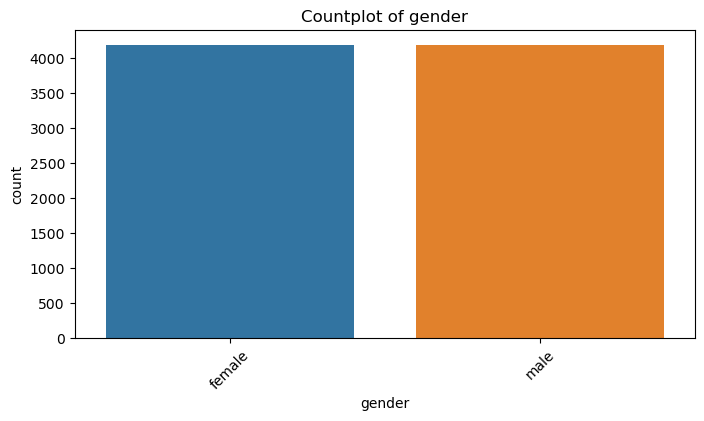

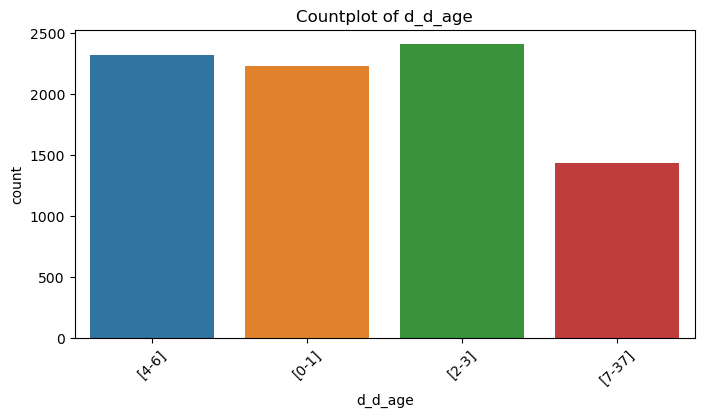

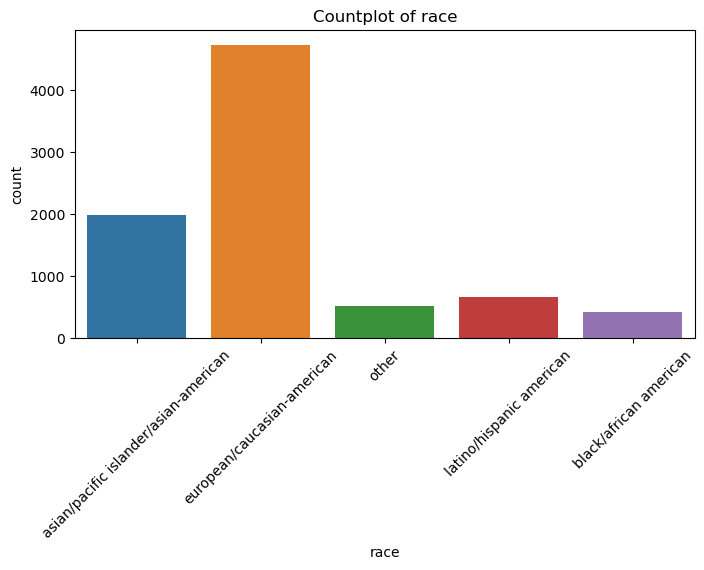

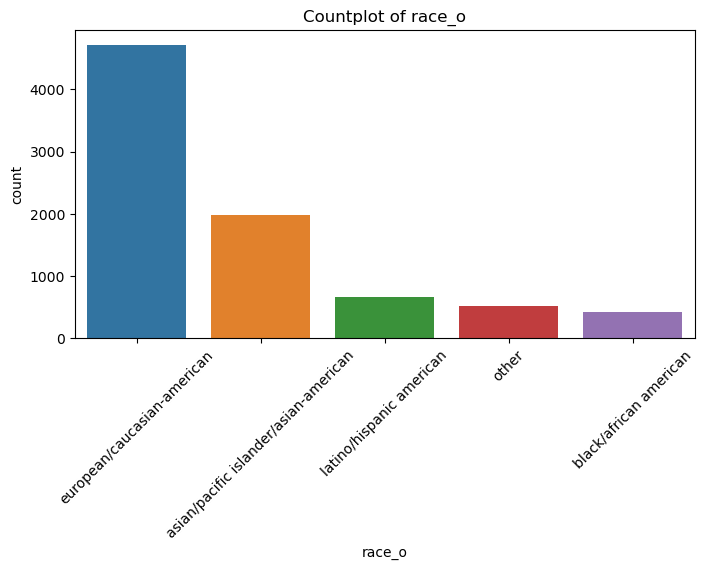

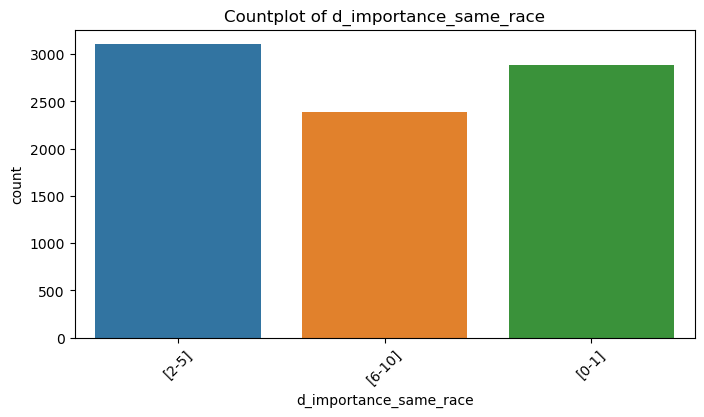

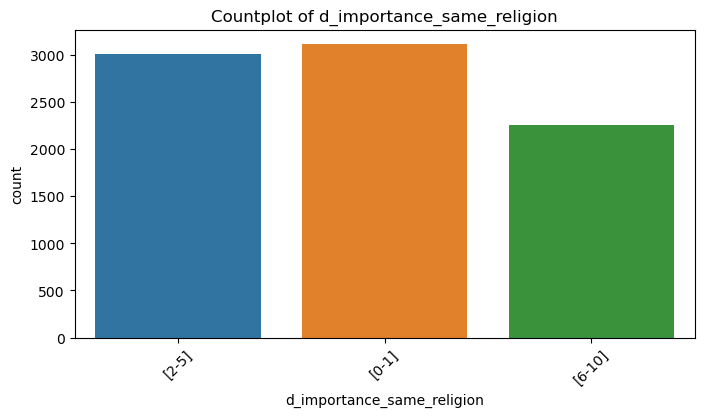

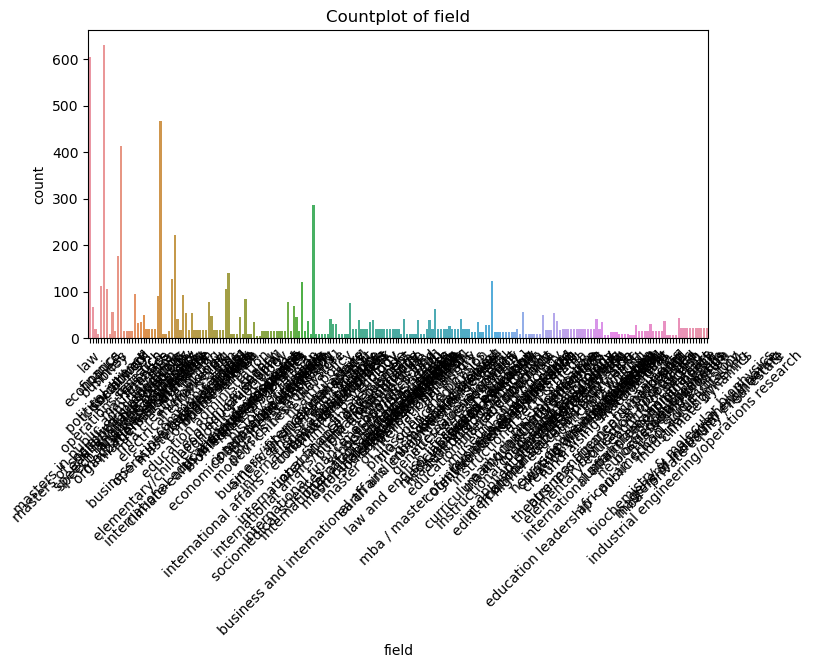

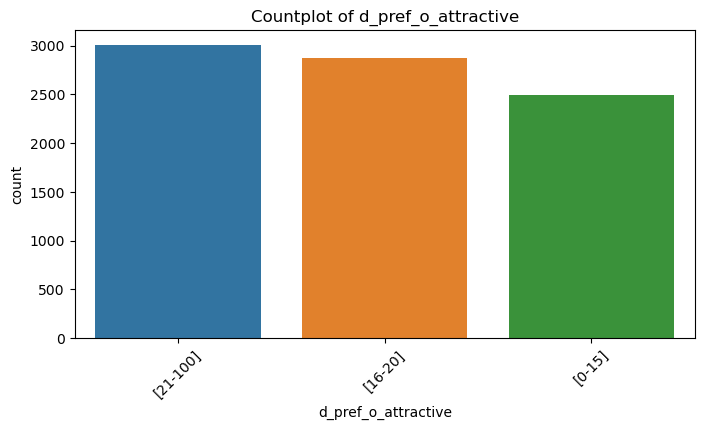

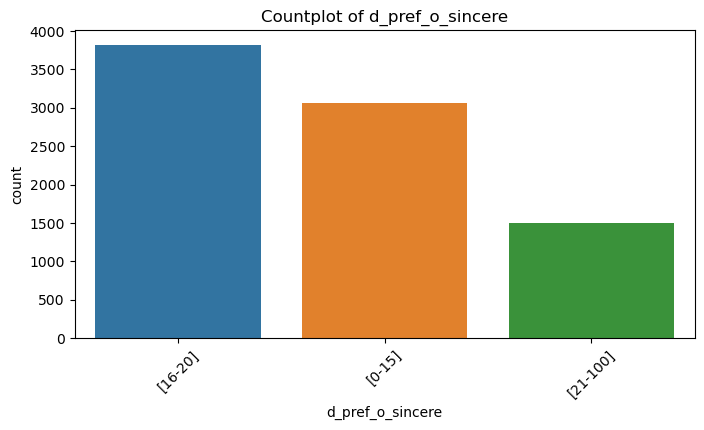

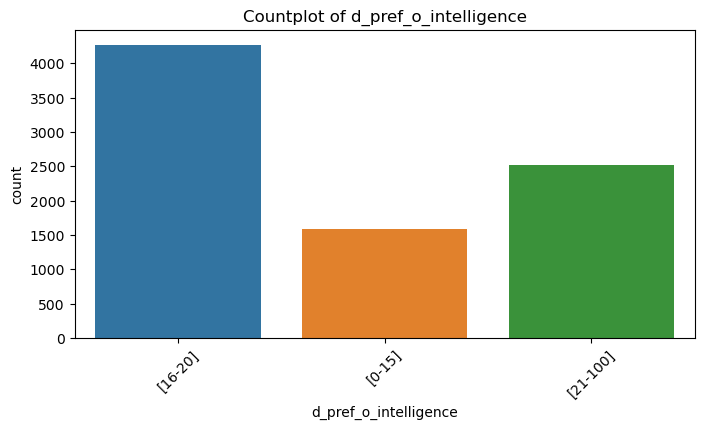

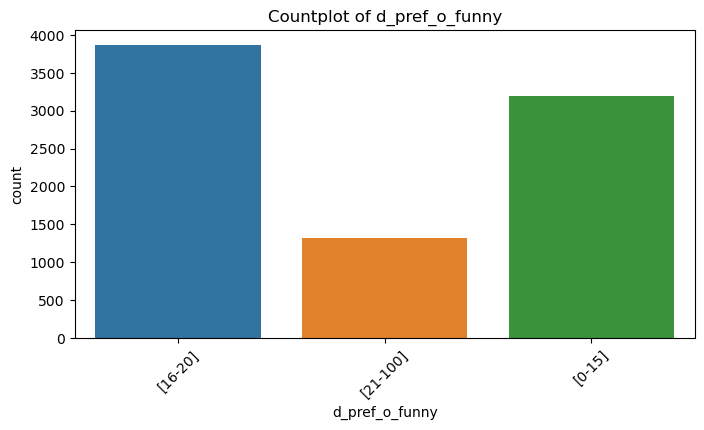

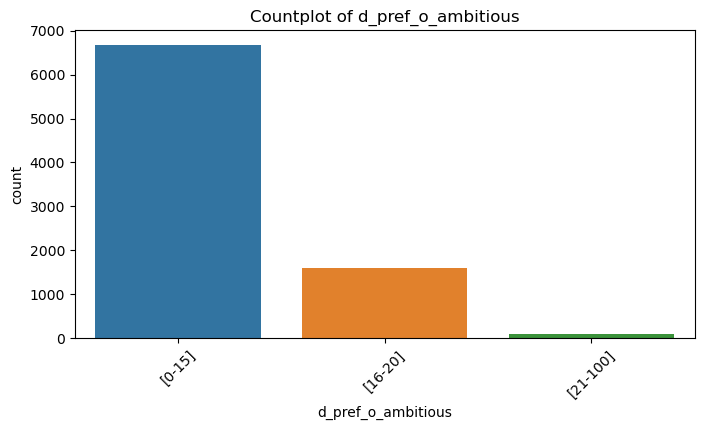

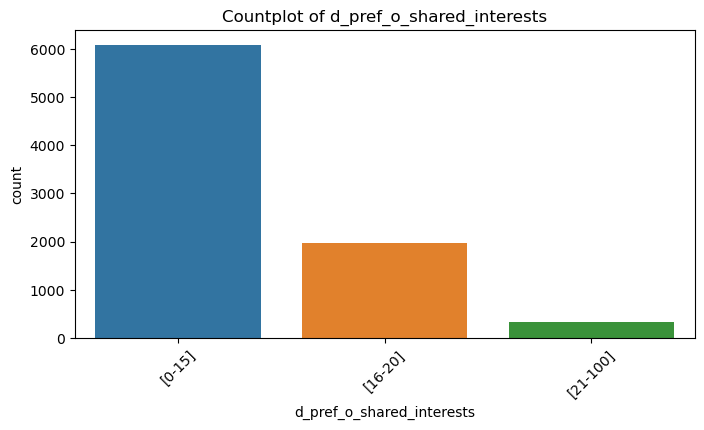

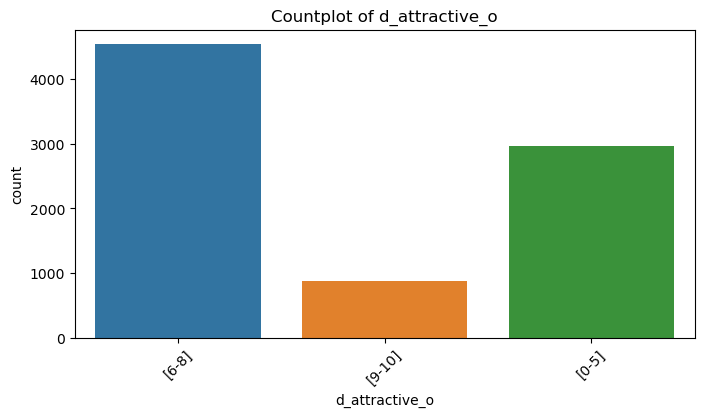

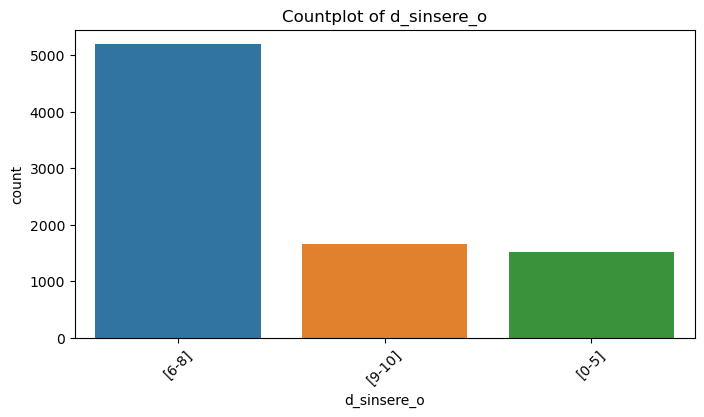

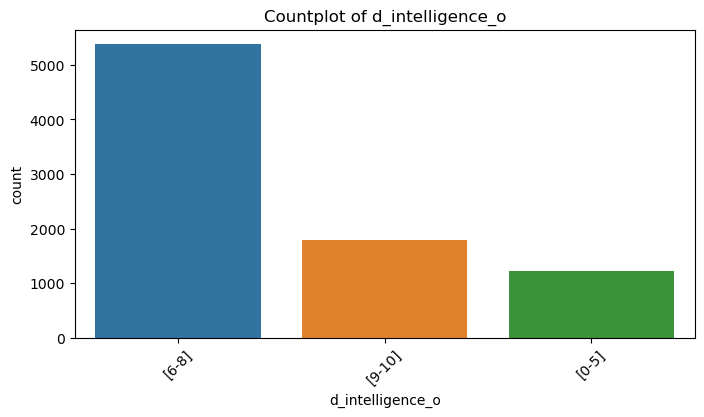

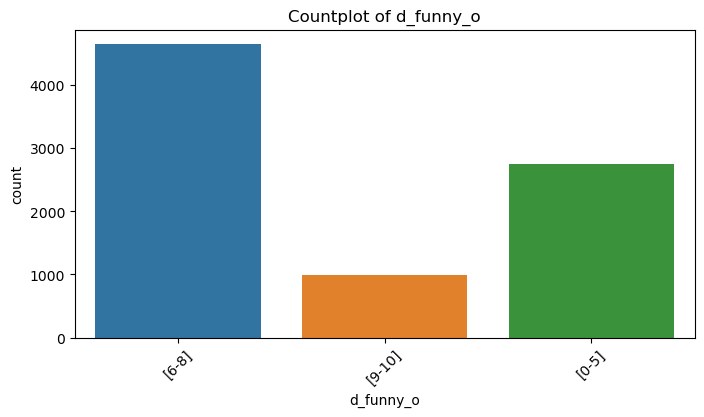

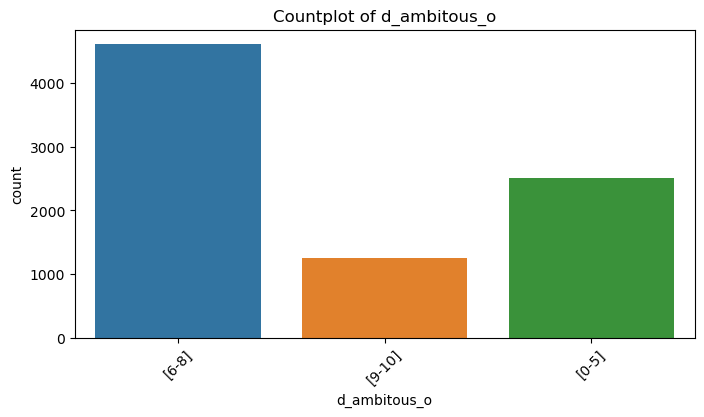

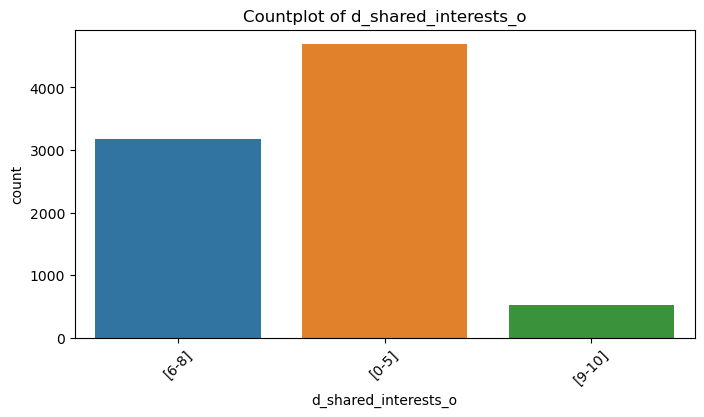

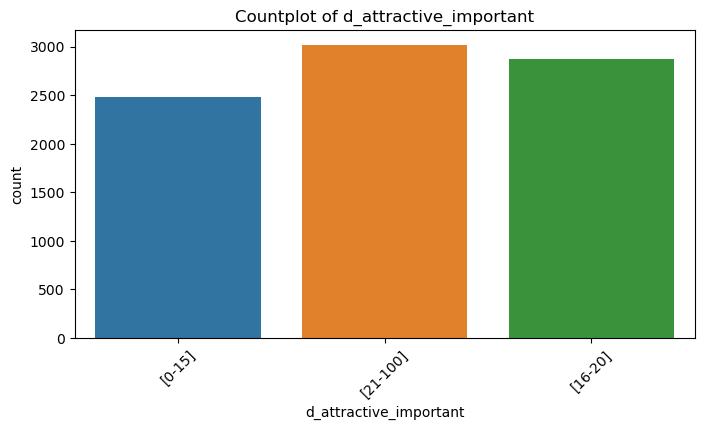

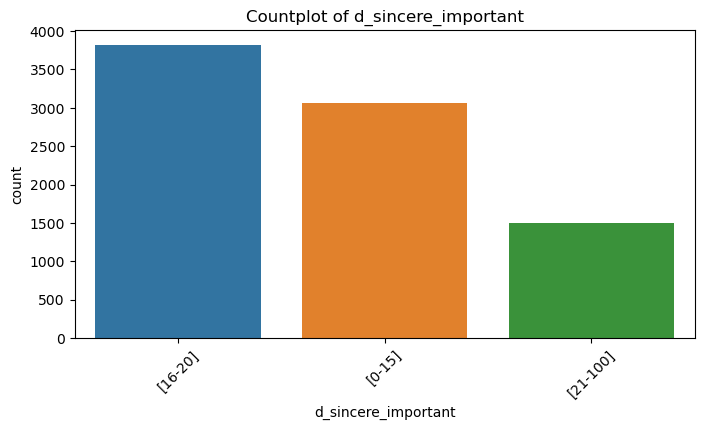

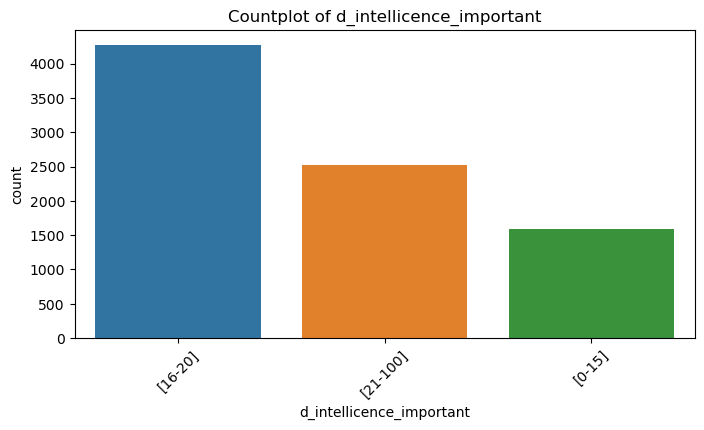

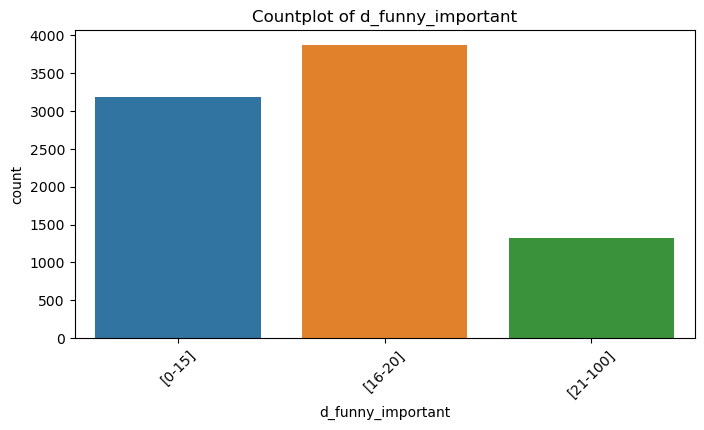

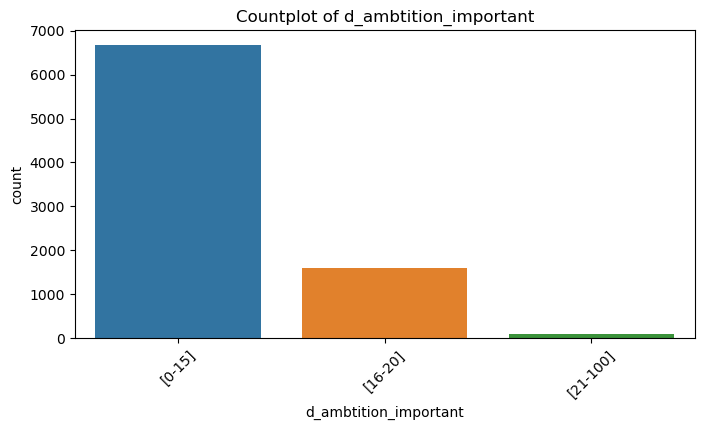

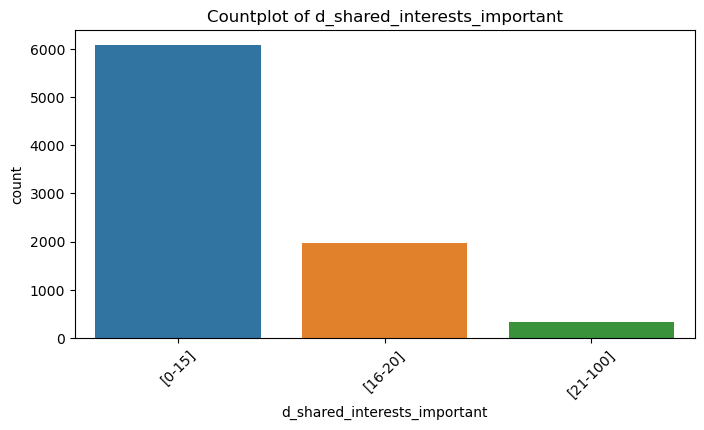

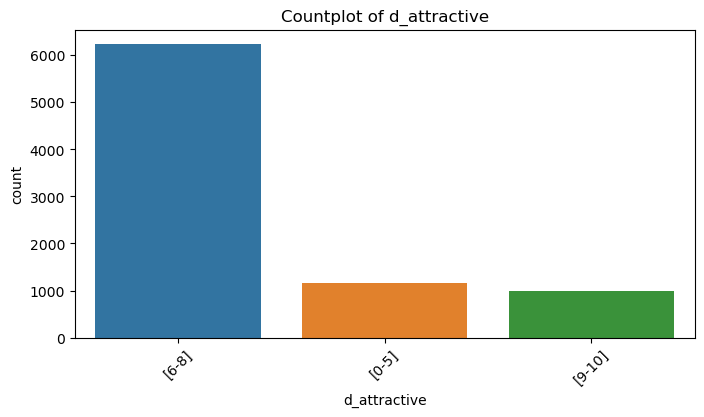

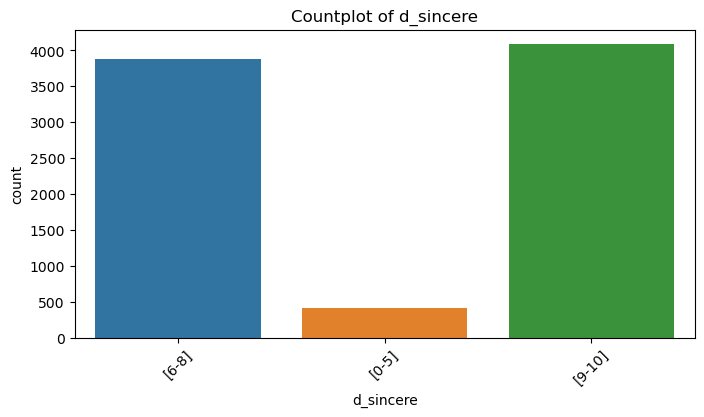

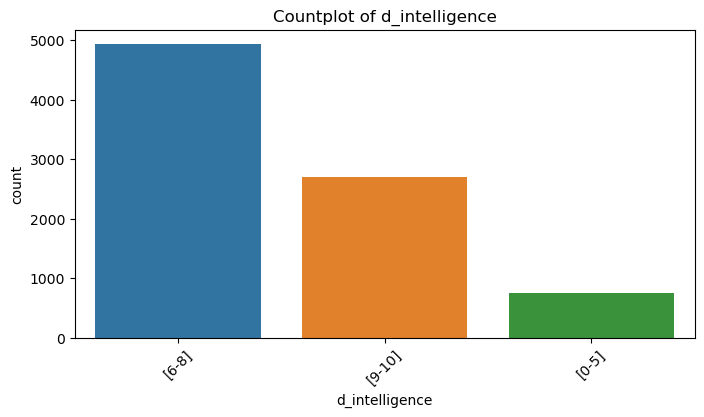

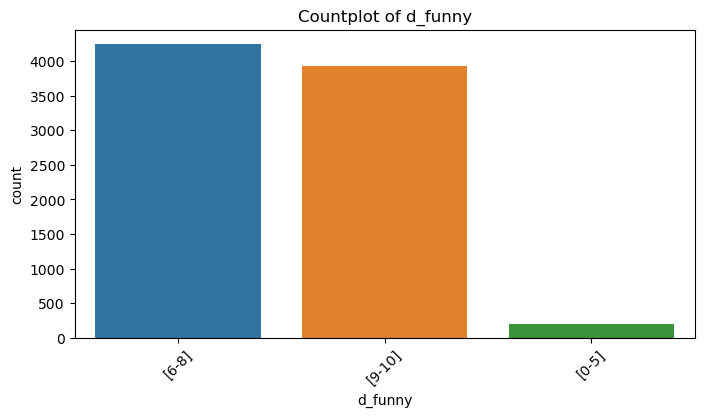

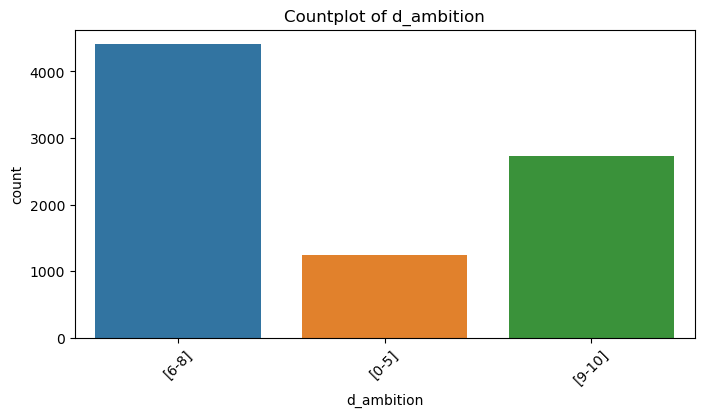

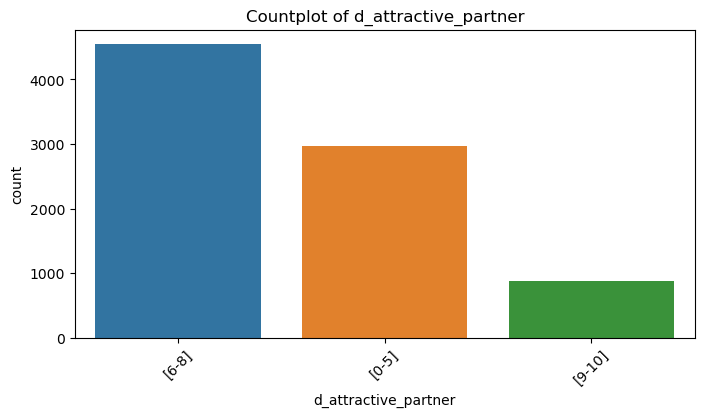

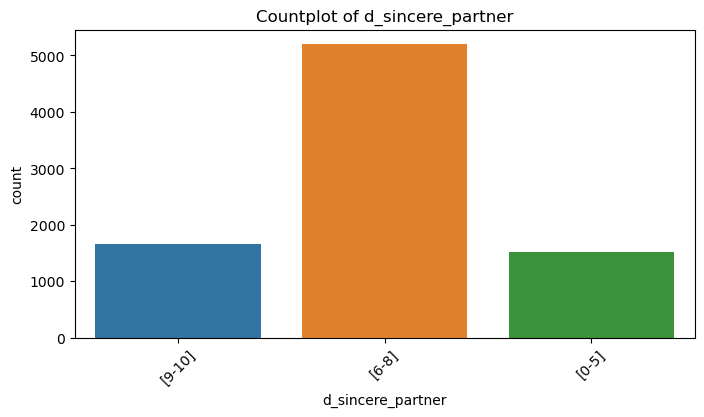

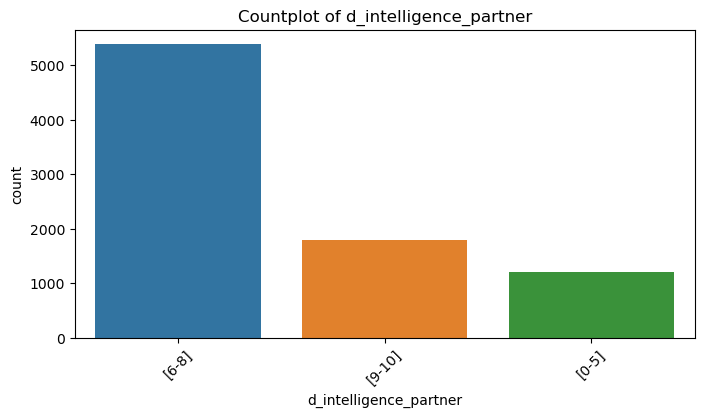

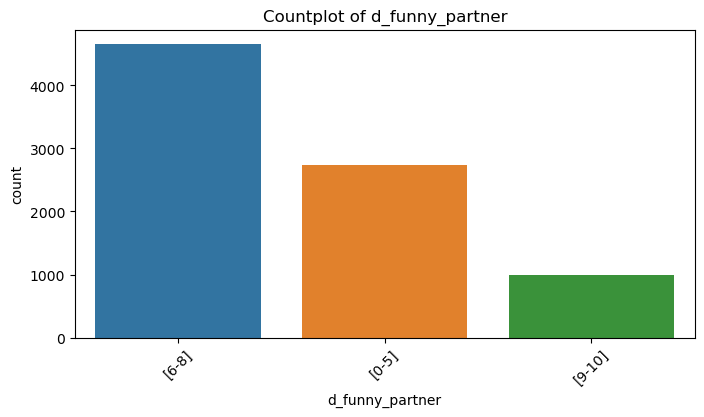

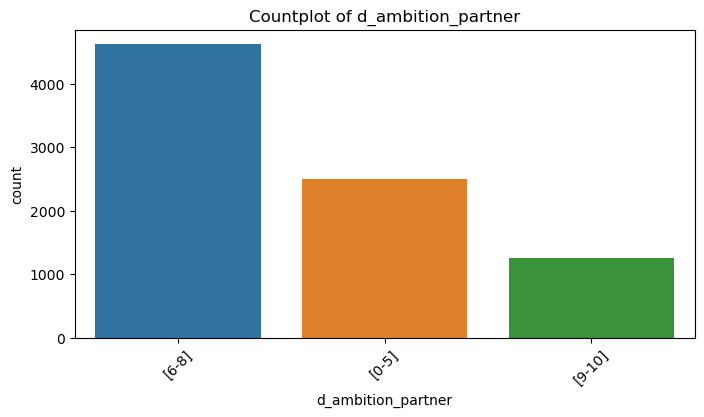

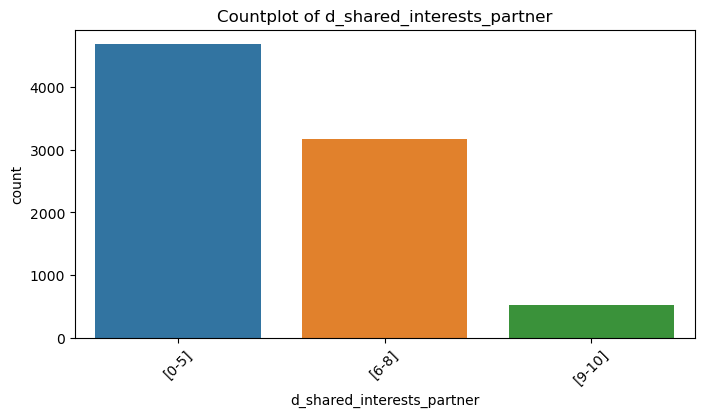

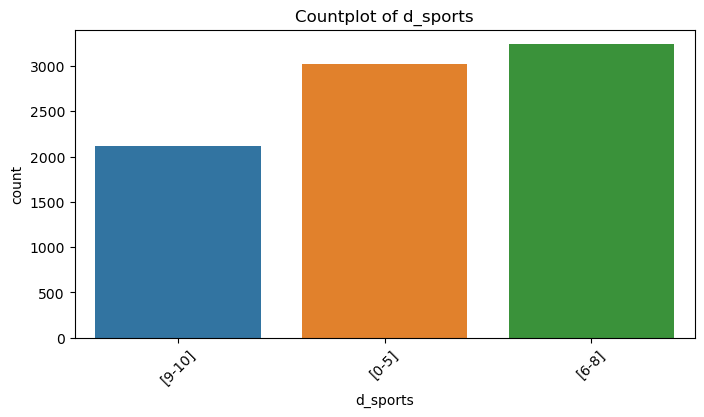

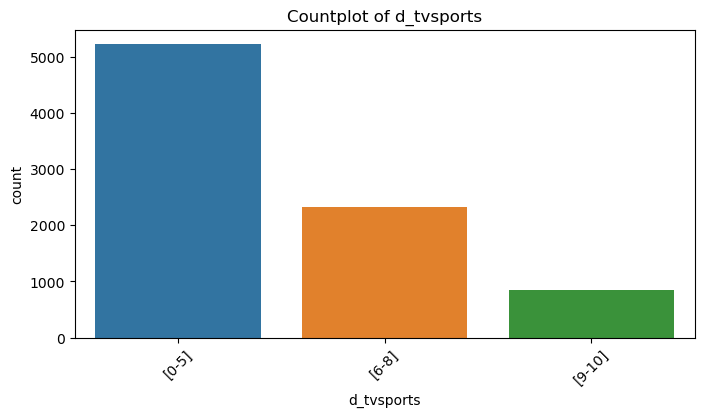

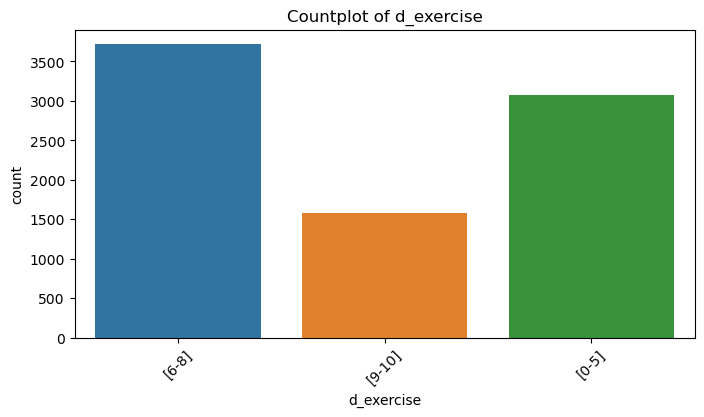

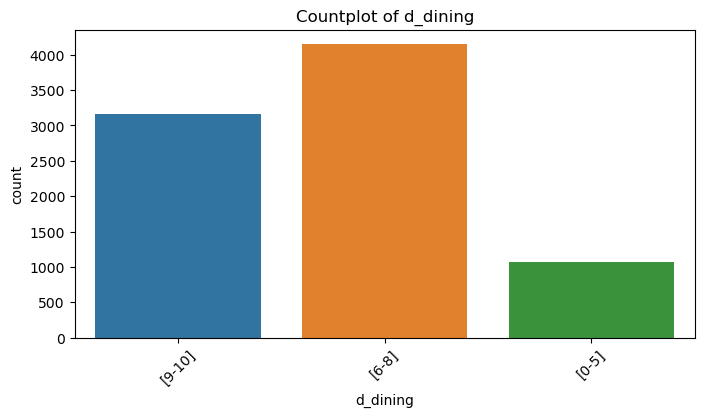

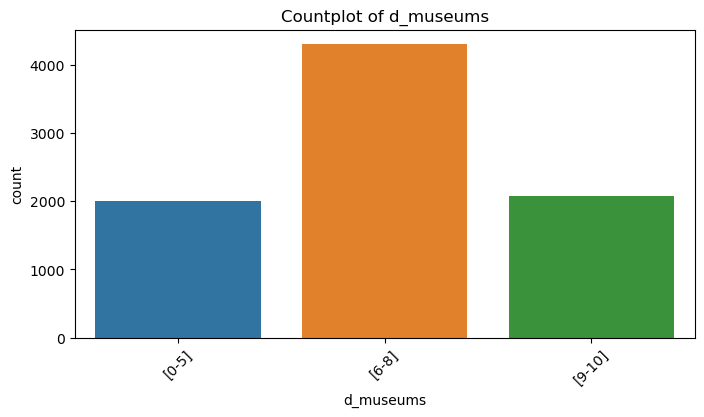

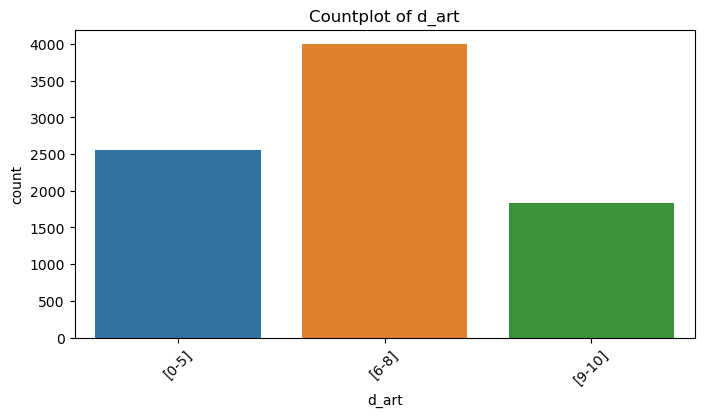

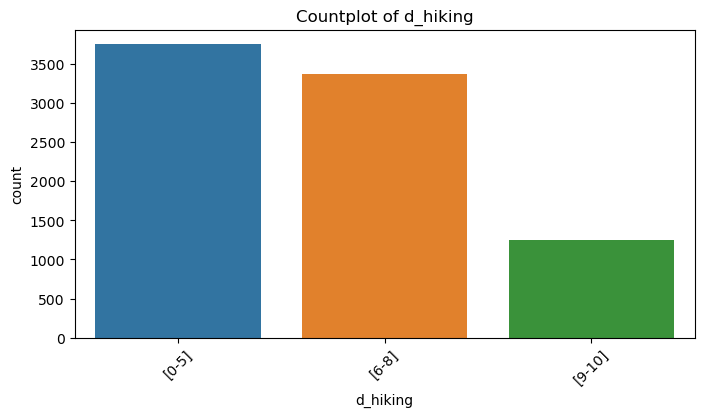

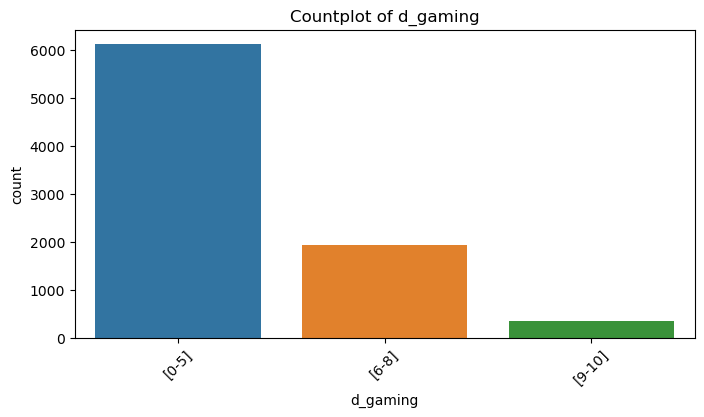

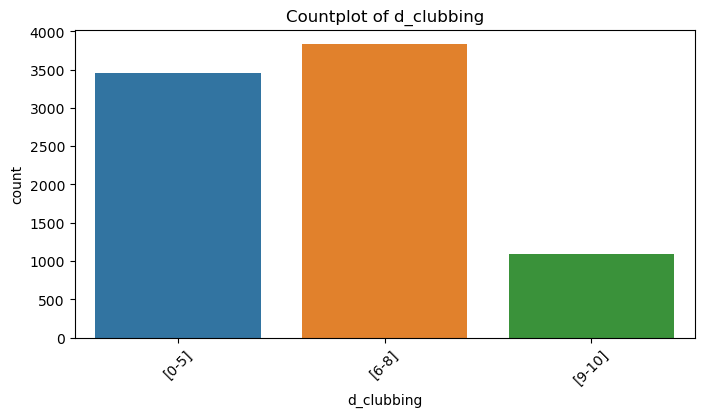

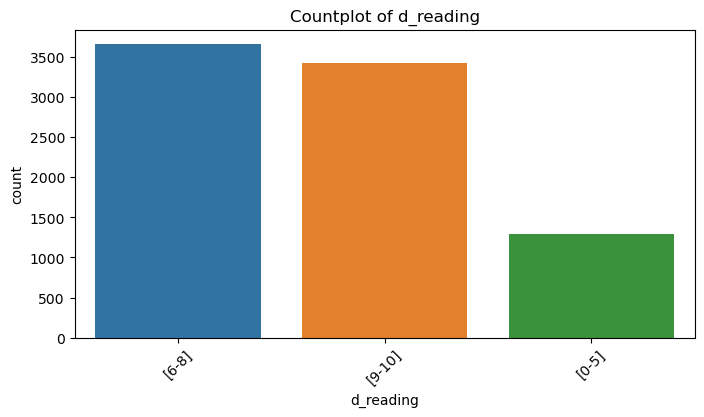

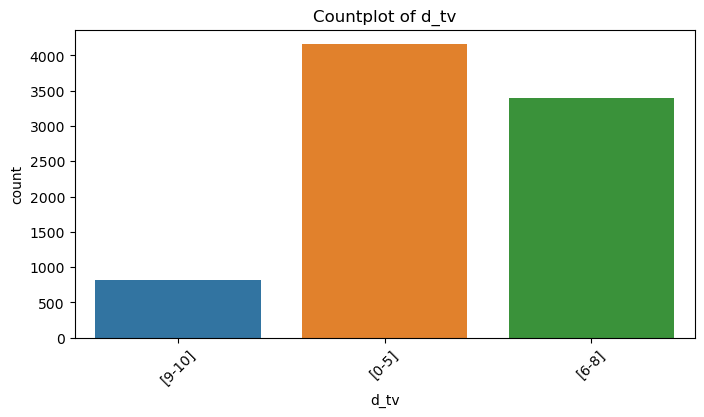

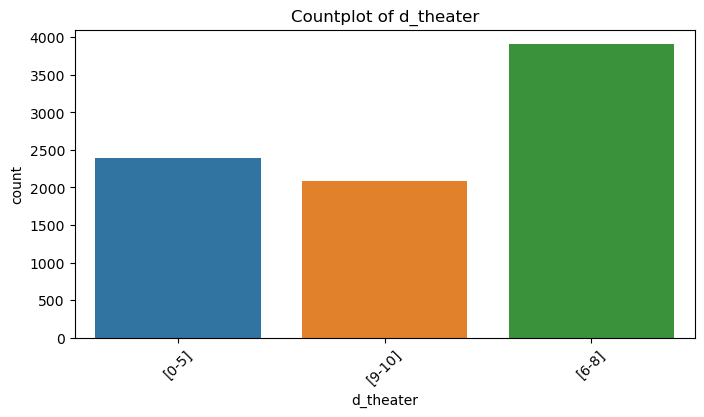

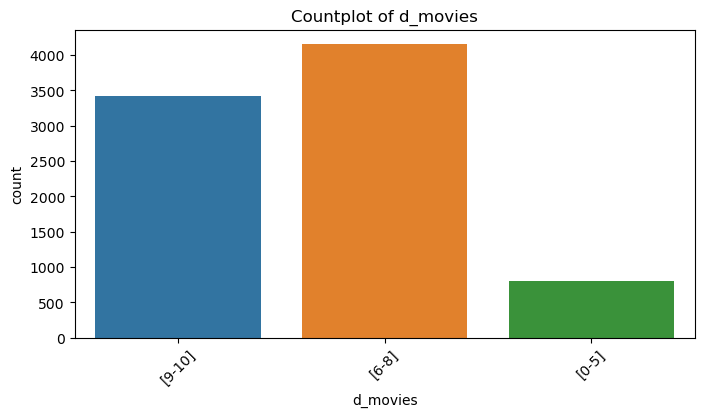

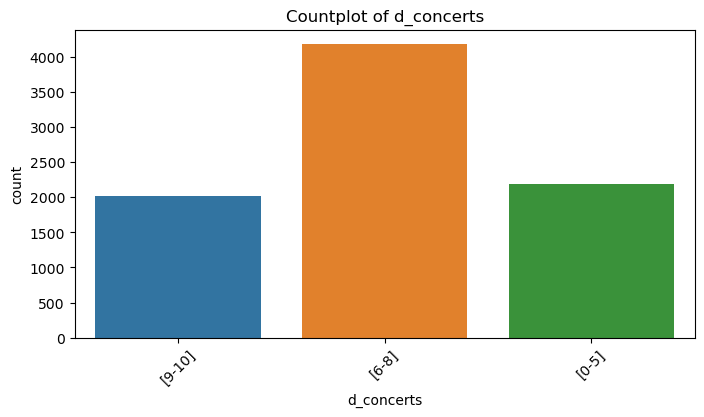

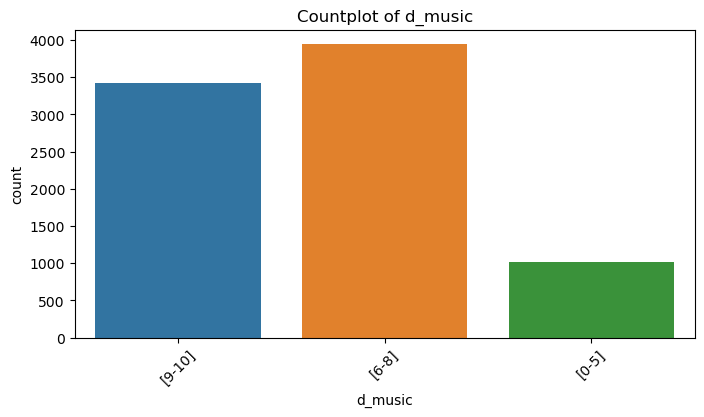

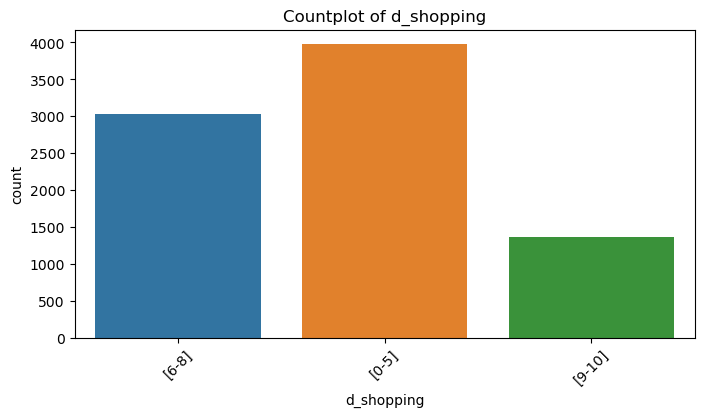

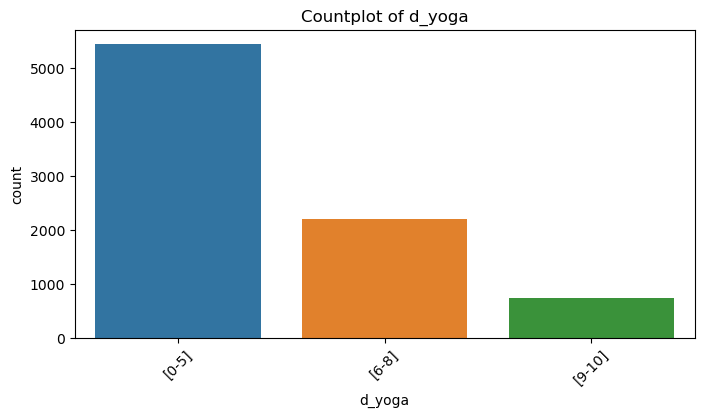

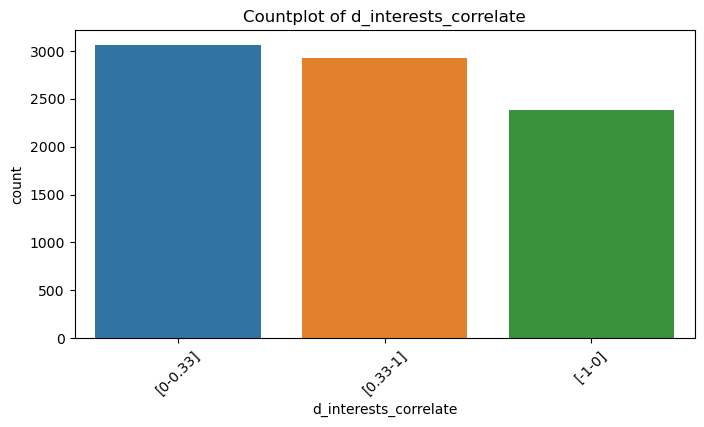

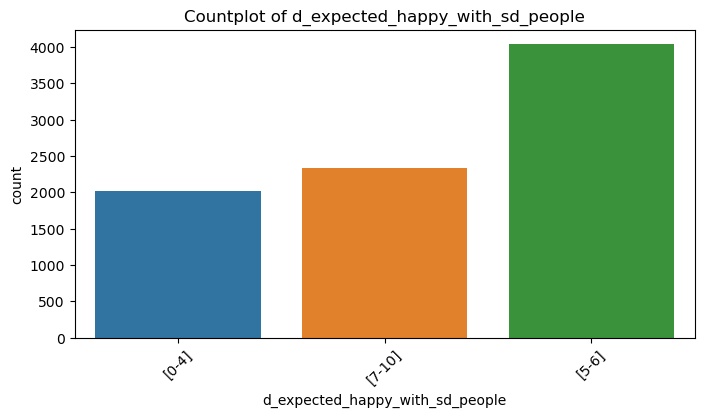

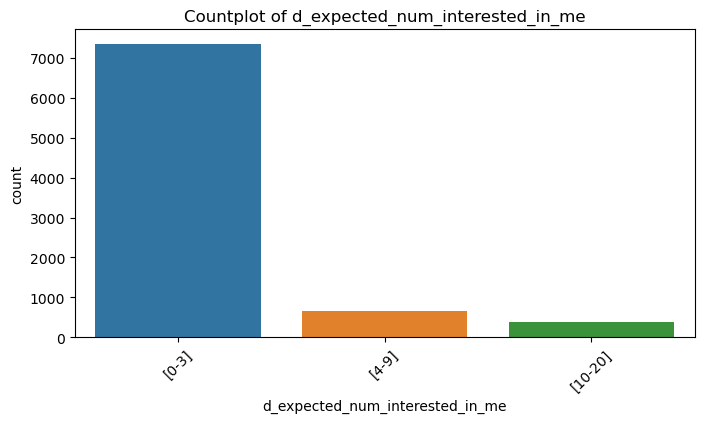

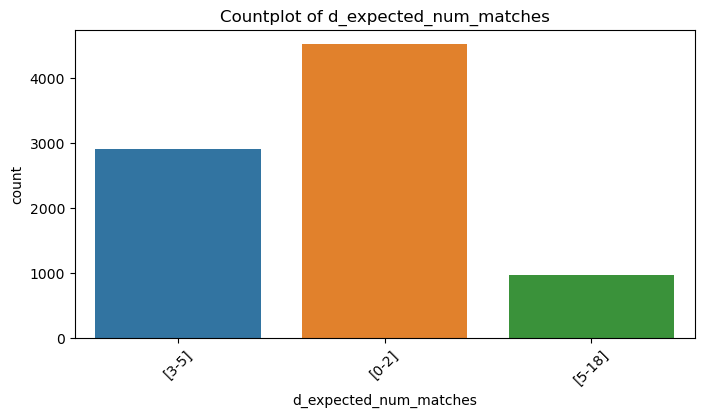

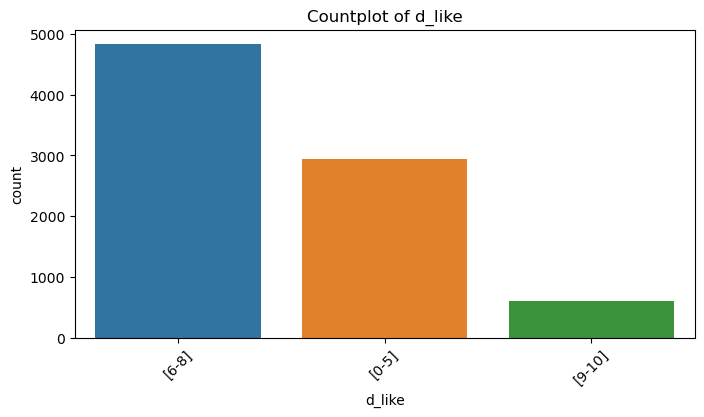

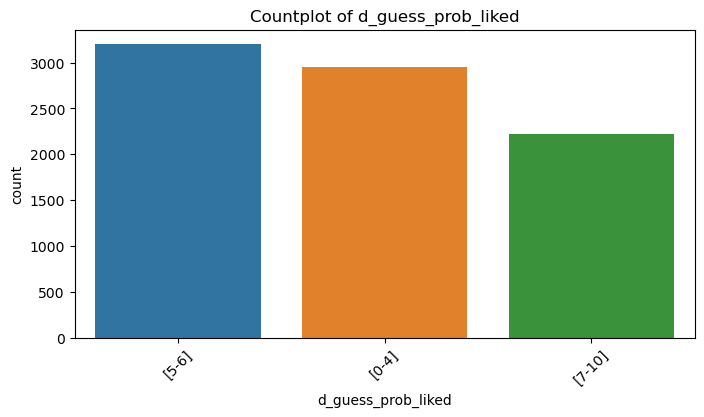

In [18]:
# Step 4: Univariate Analysis
# Categorical Columns
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df1, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

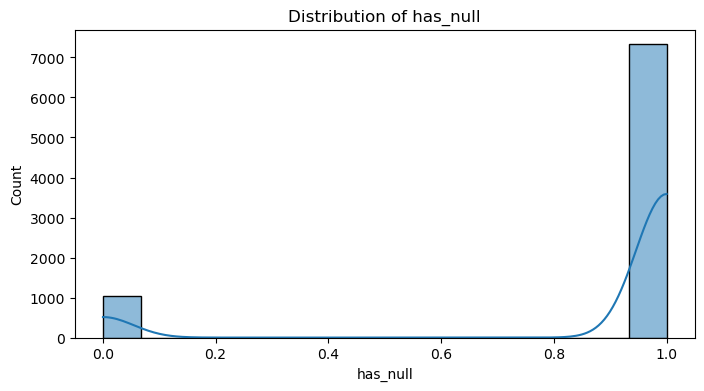

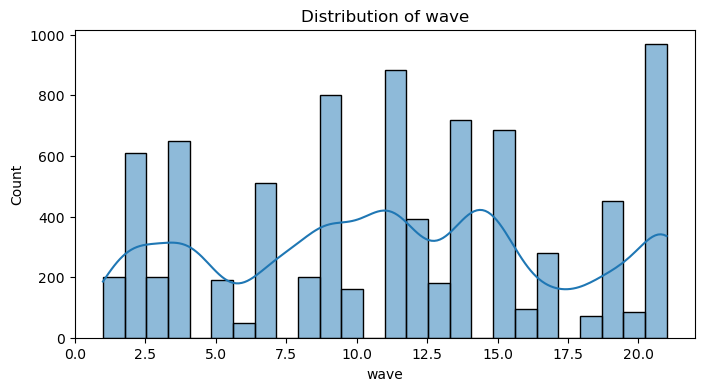

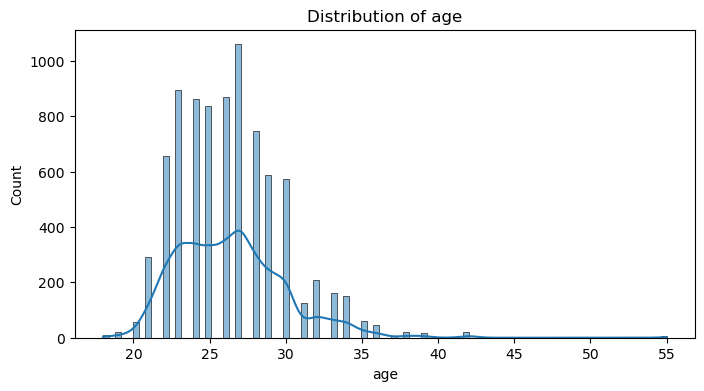

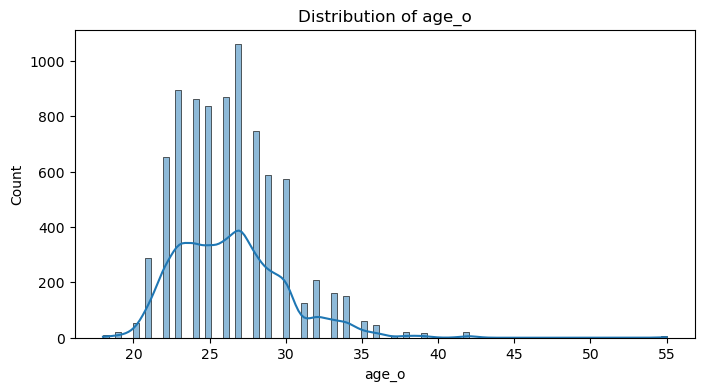

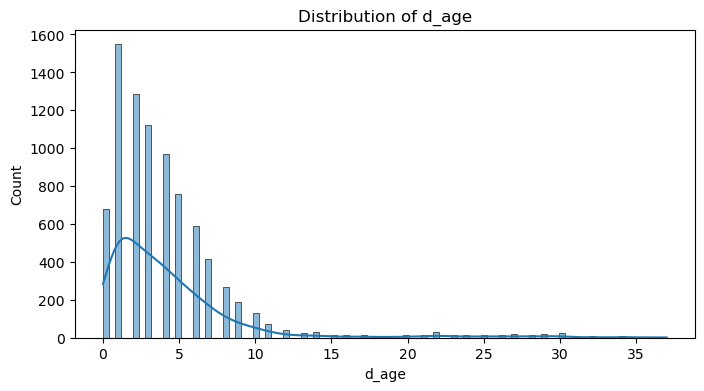

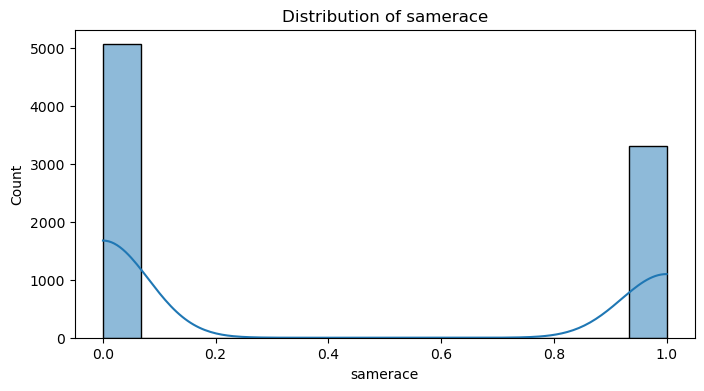

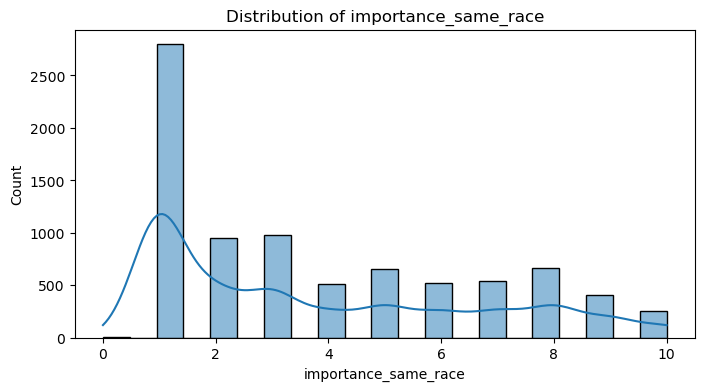

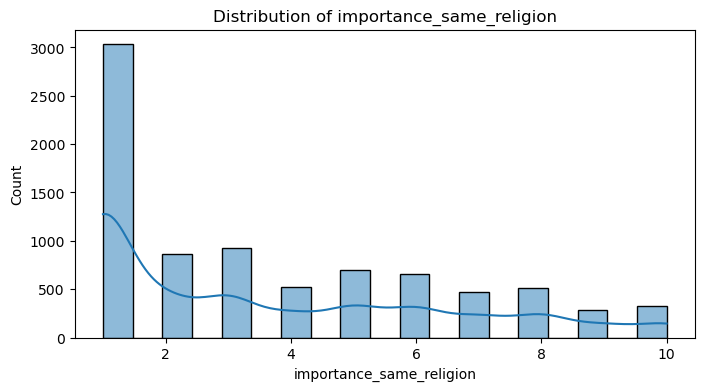

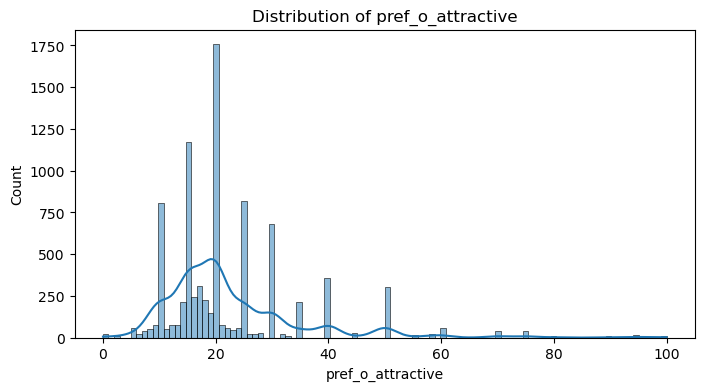

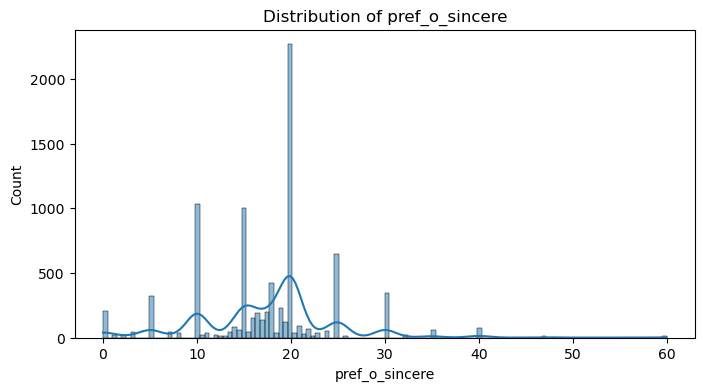

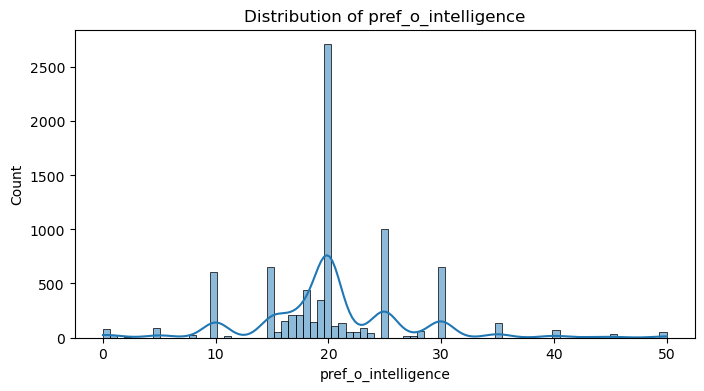

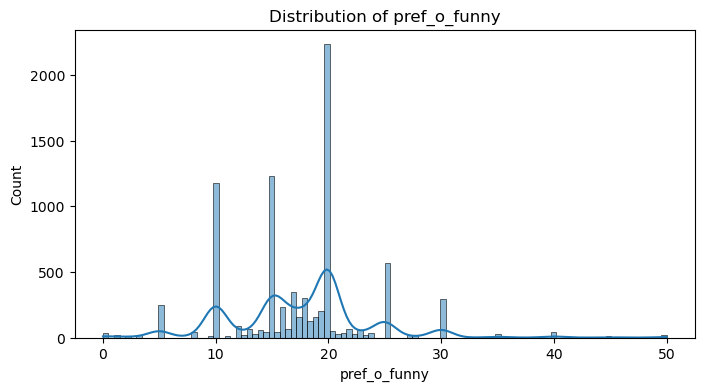

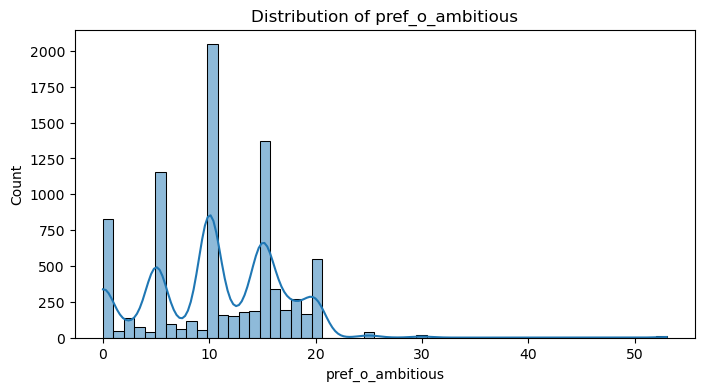

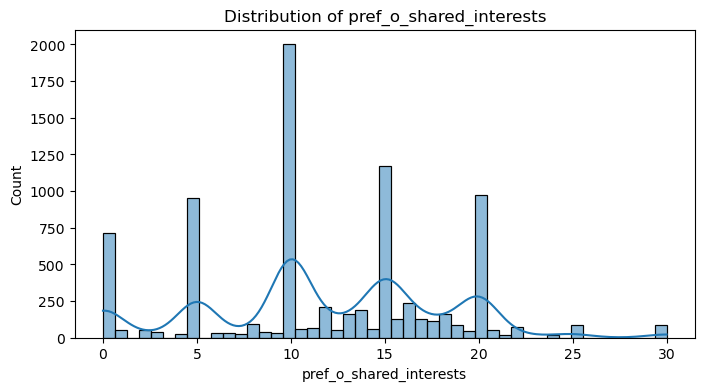

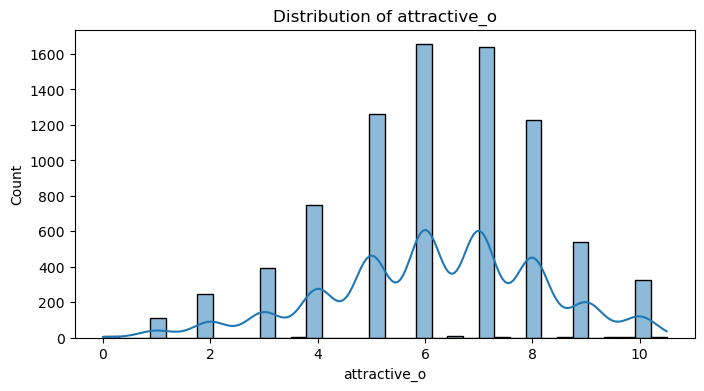

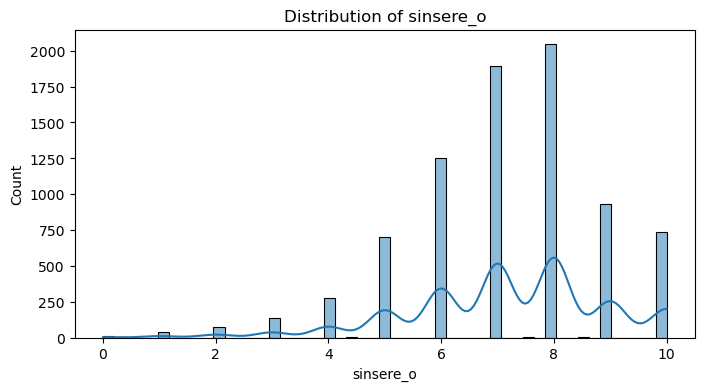

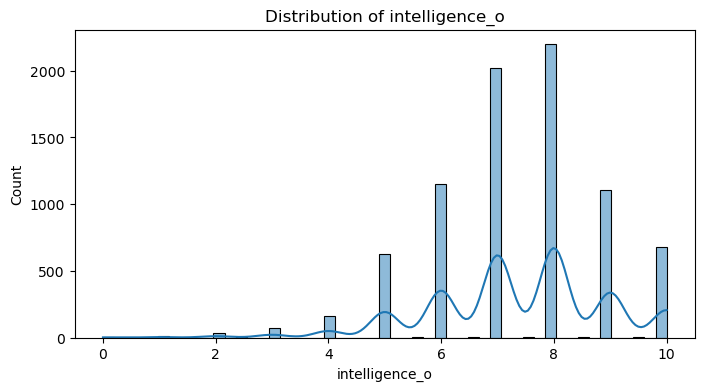

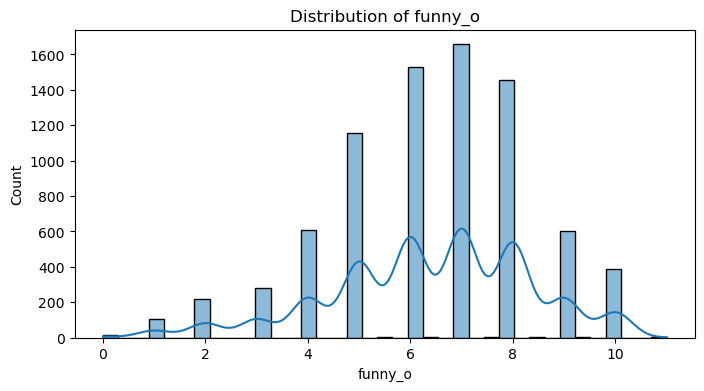

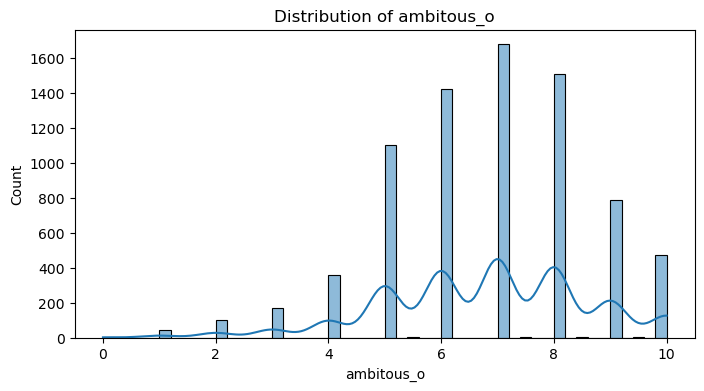

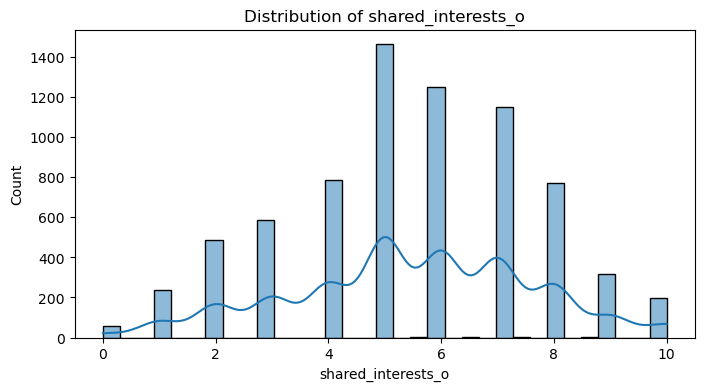

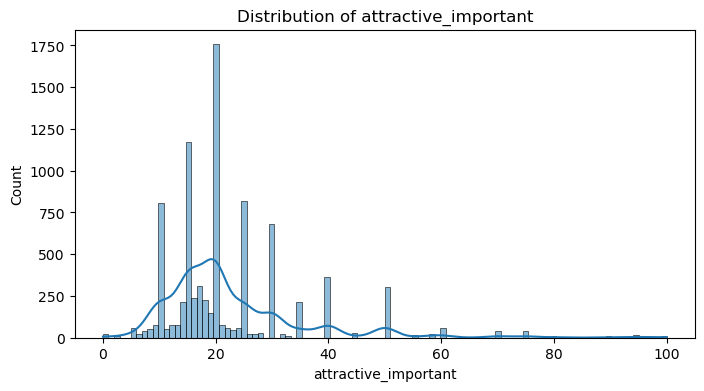

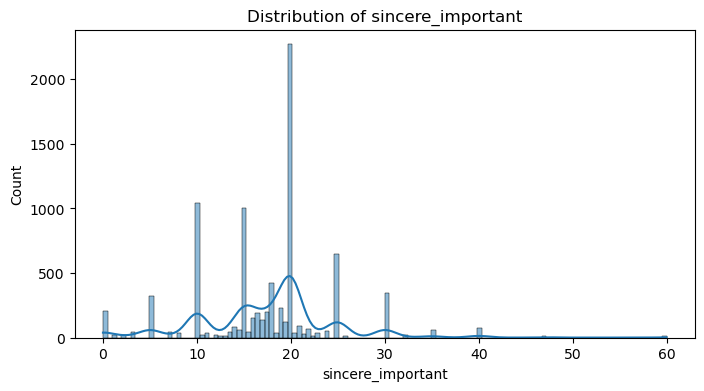

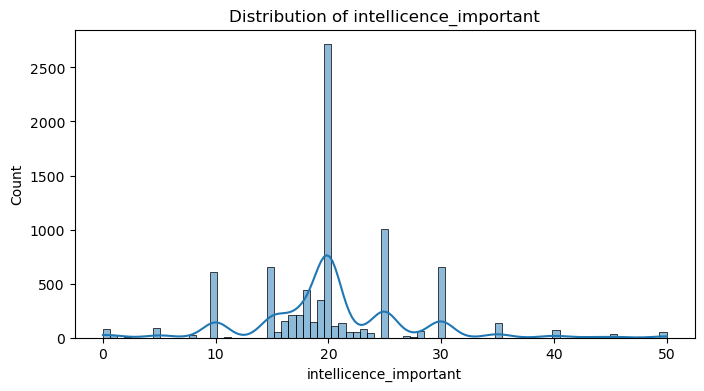

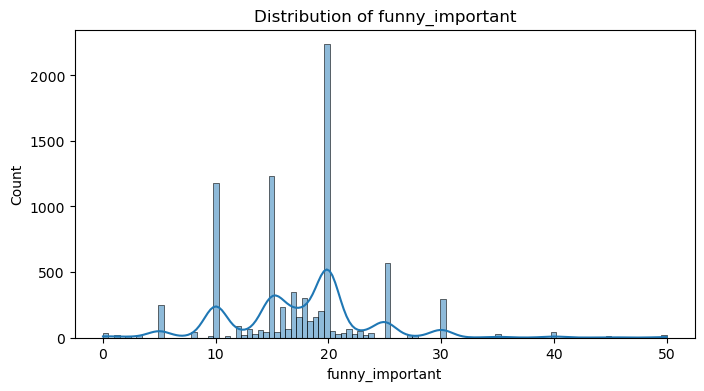

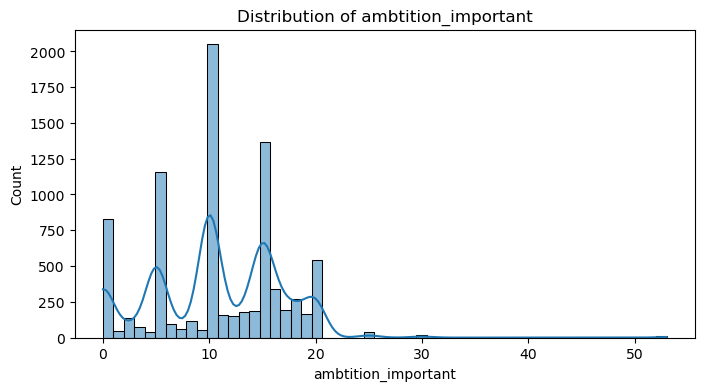

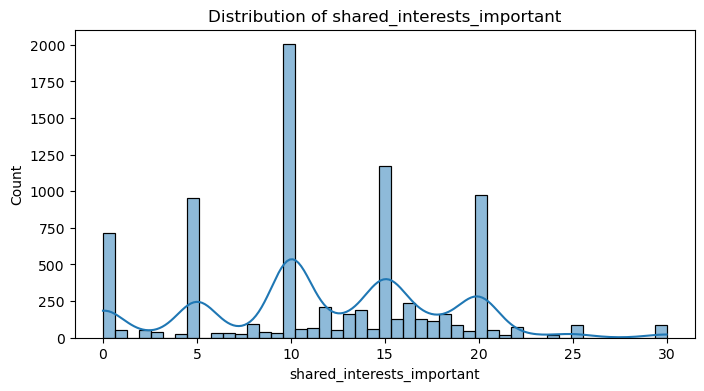

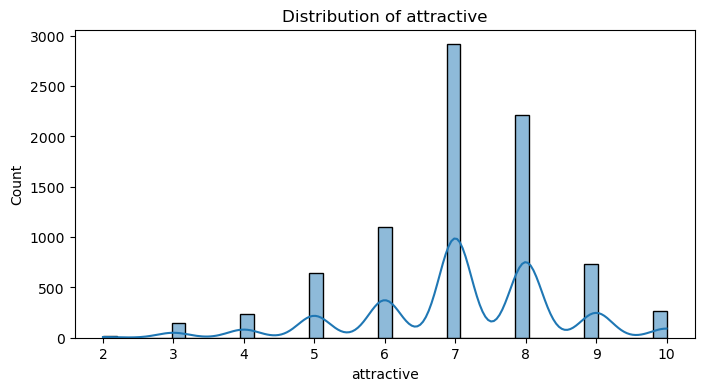

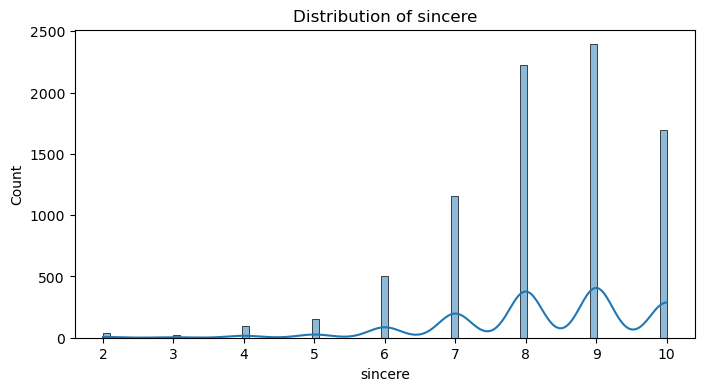

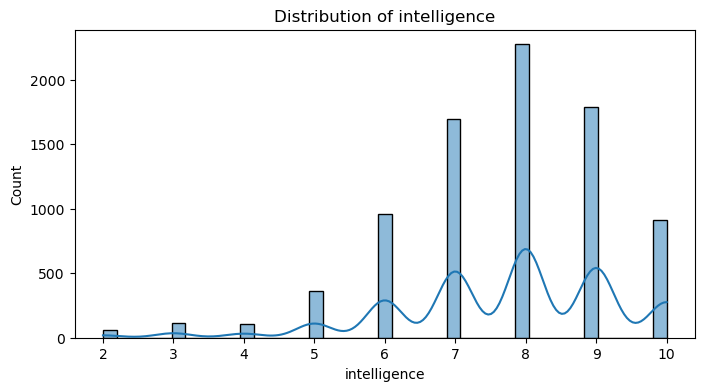

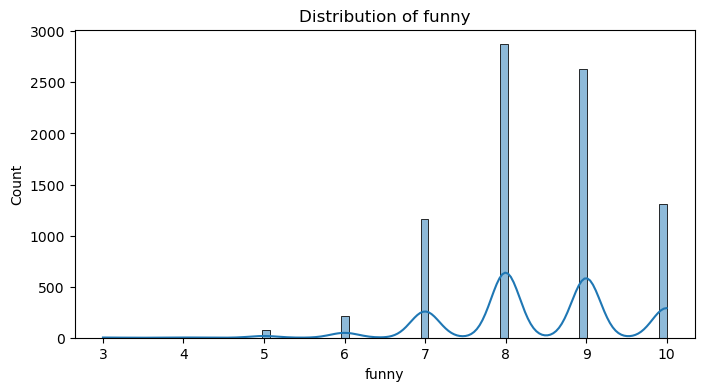

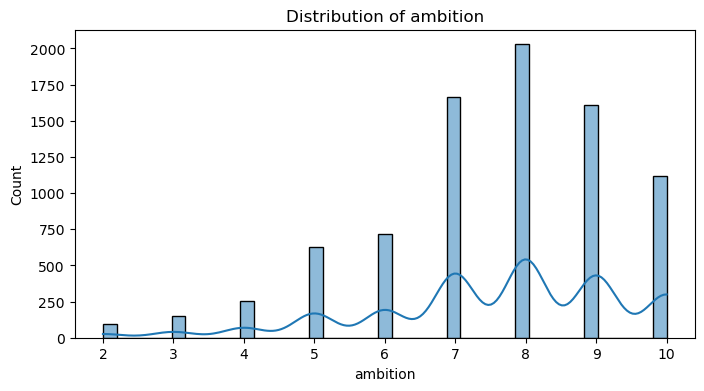

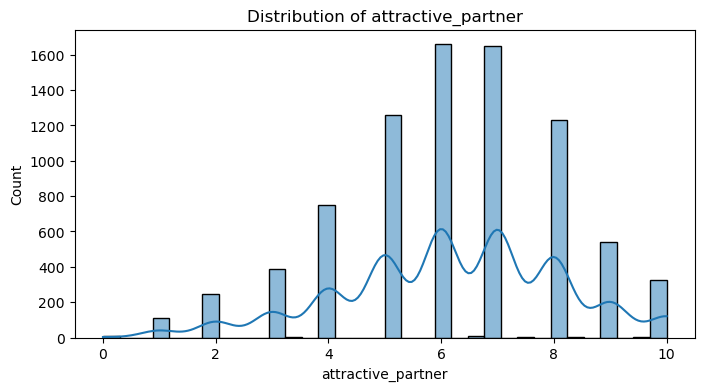

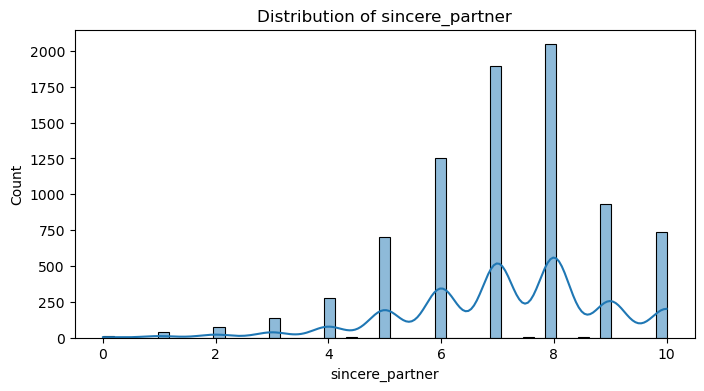

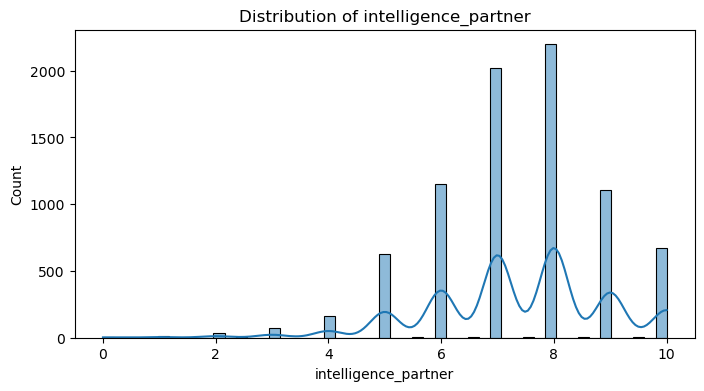

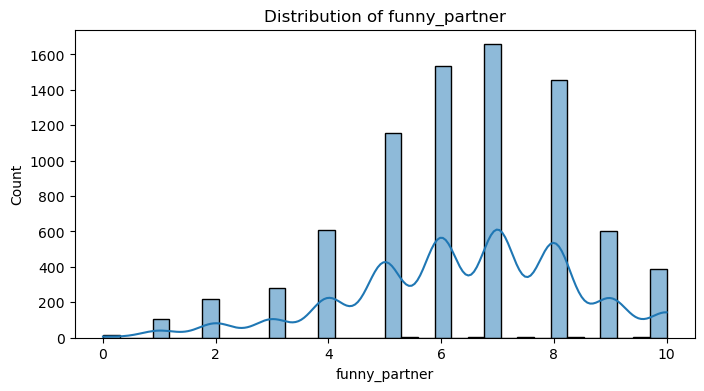

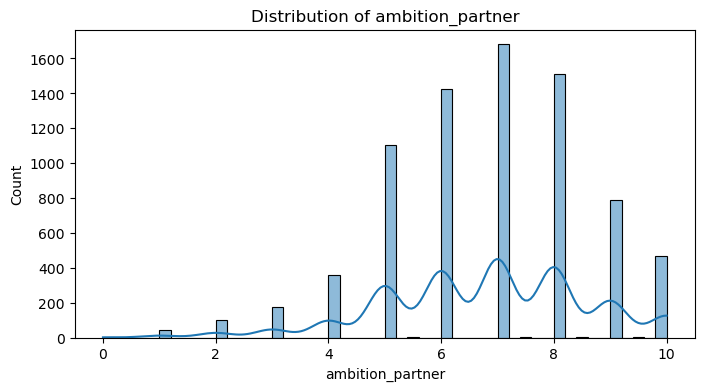

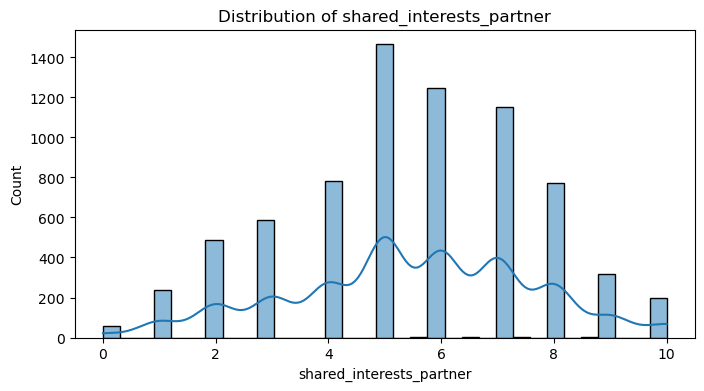

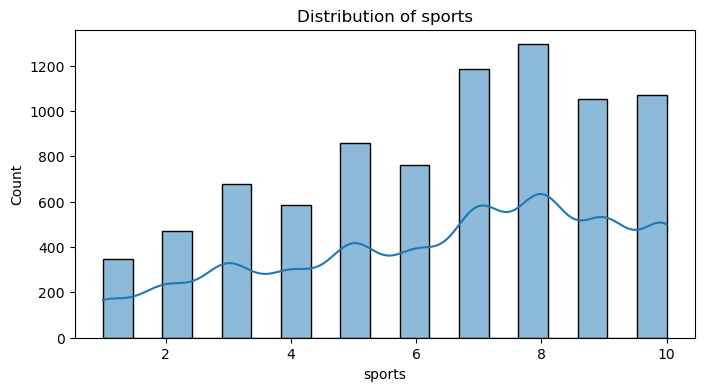

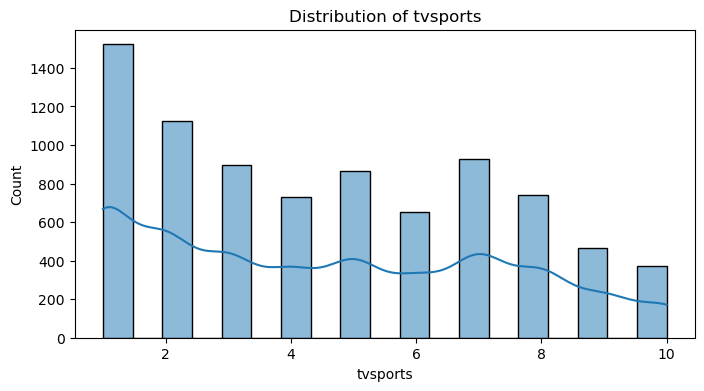

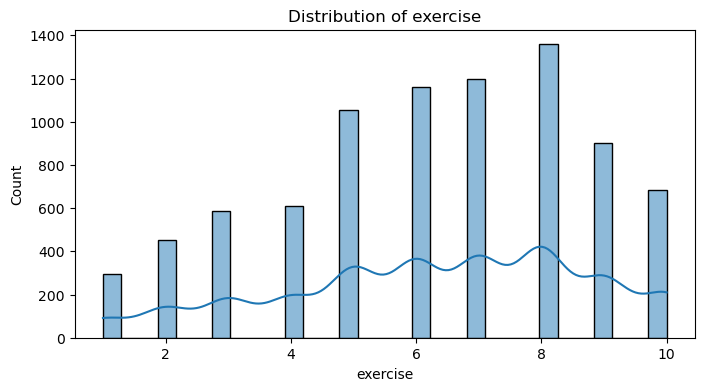

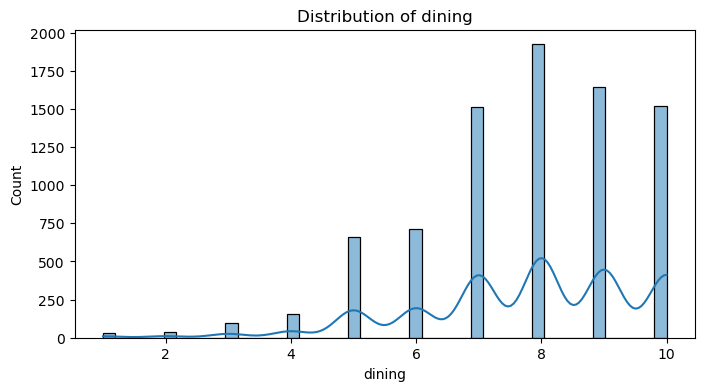

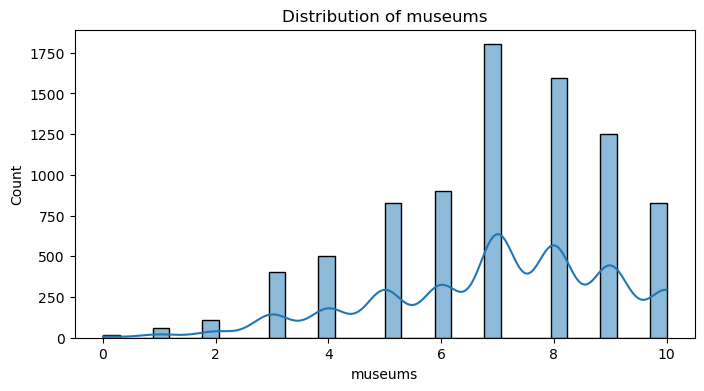

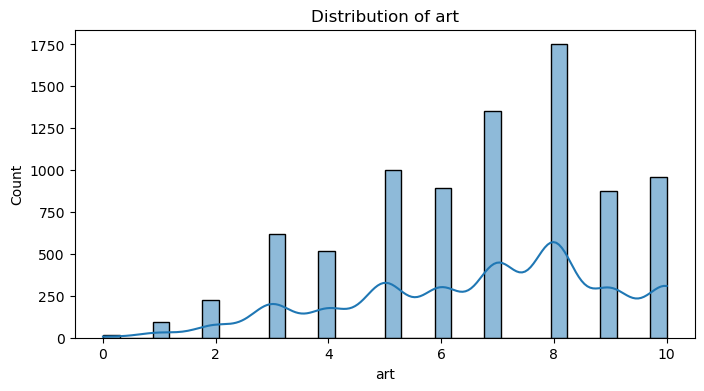

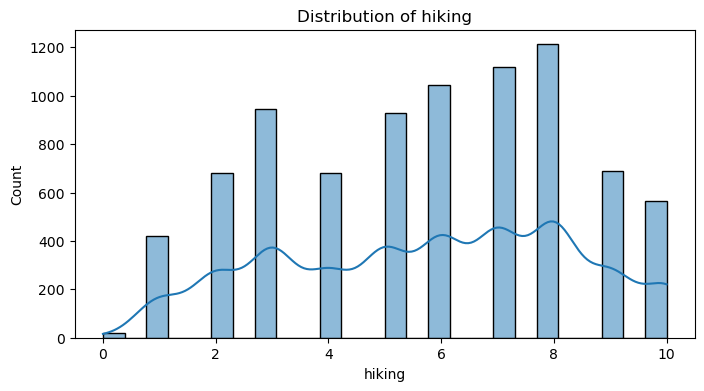

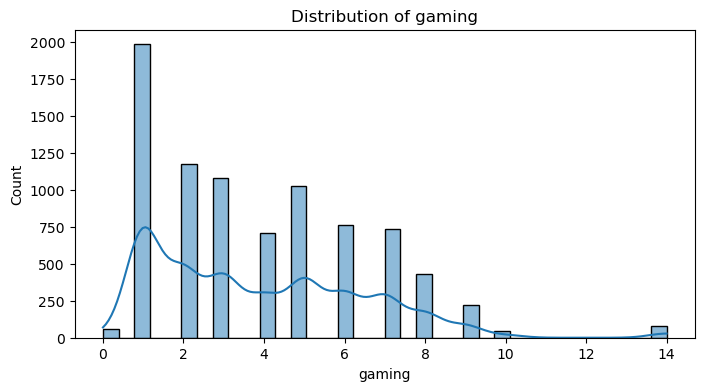

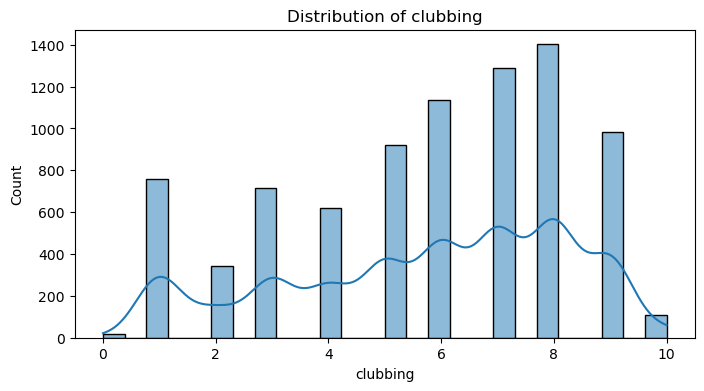

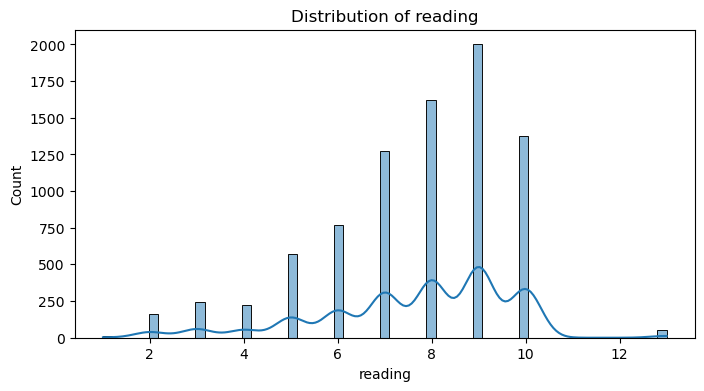

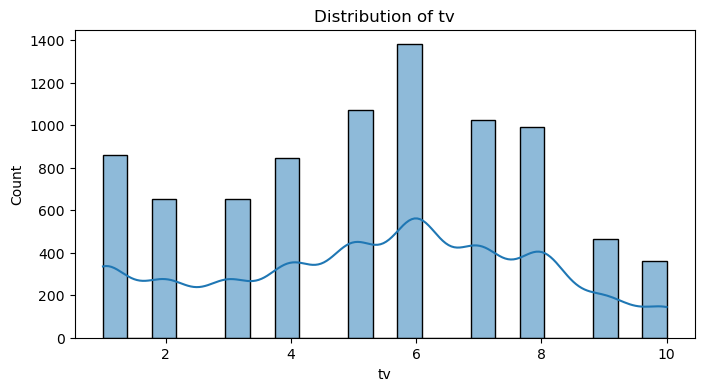

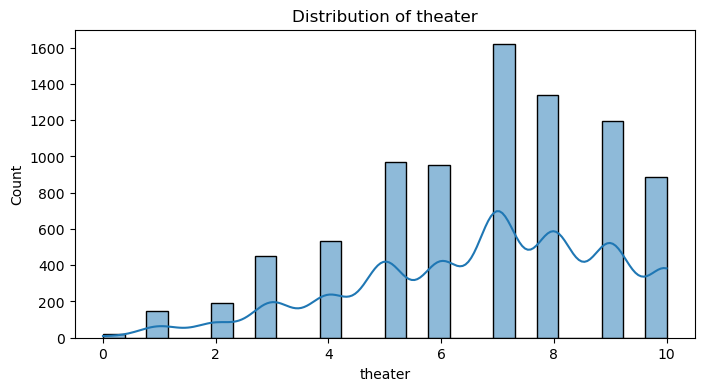

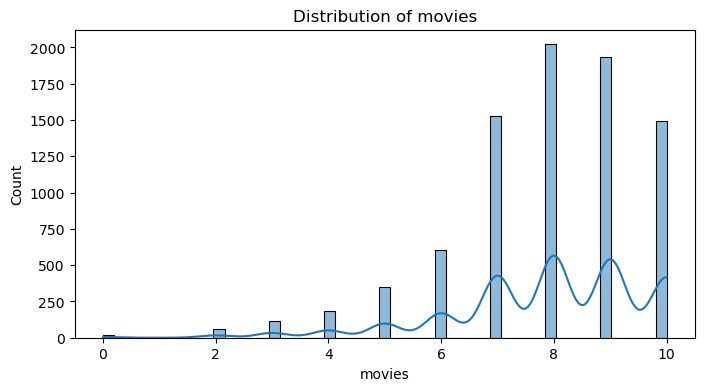

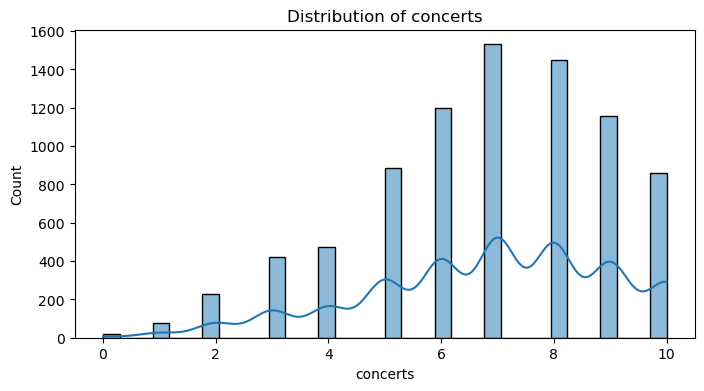

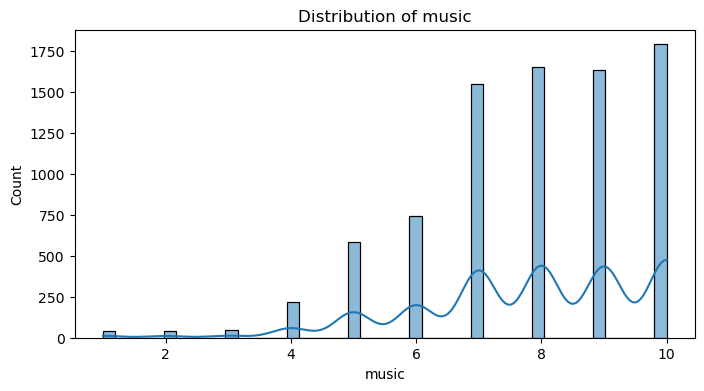

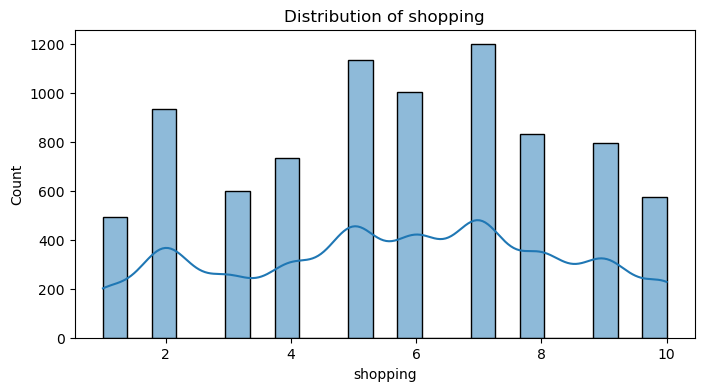

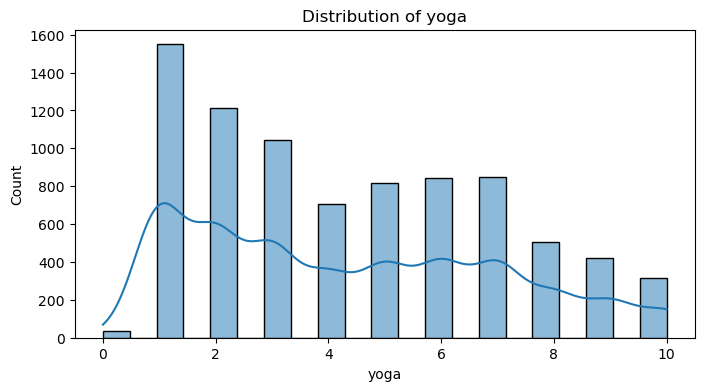

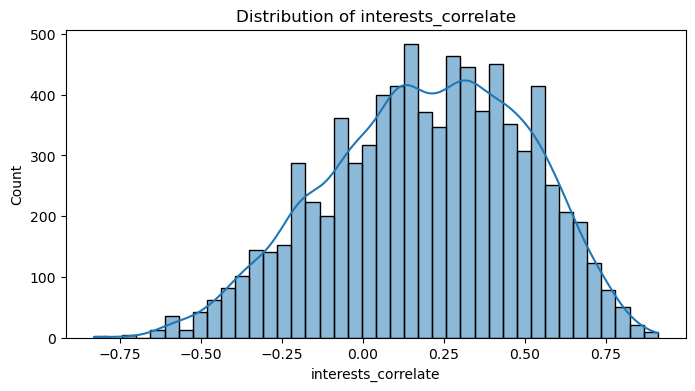

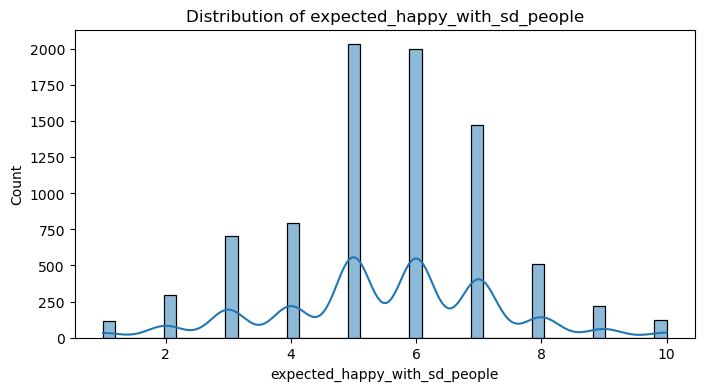

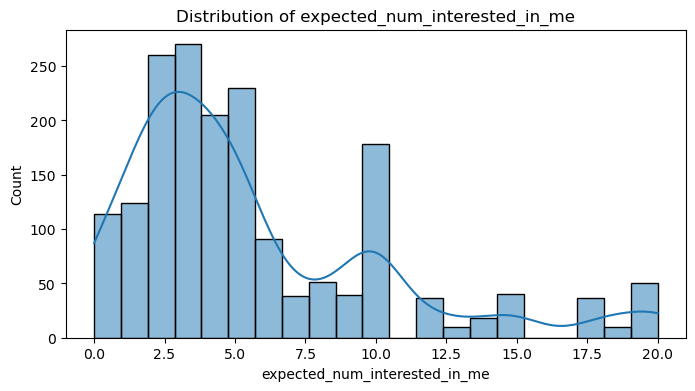

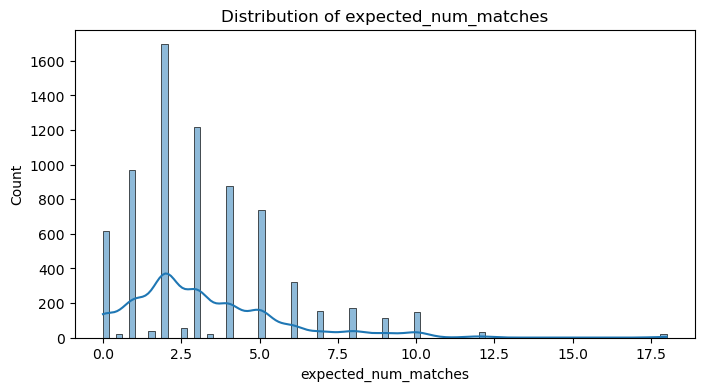

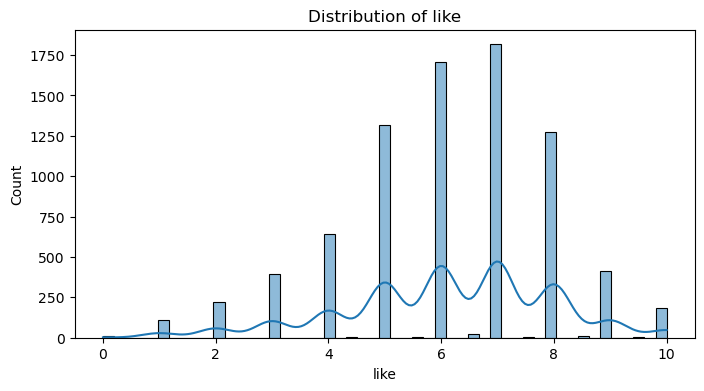

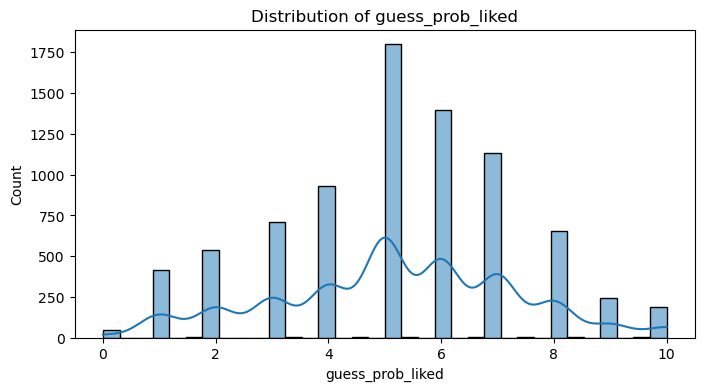

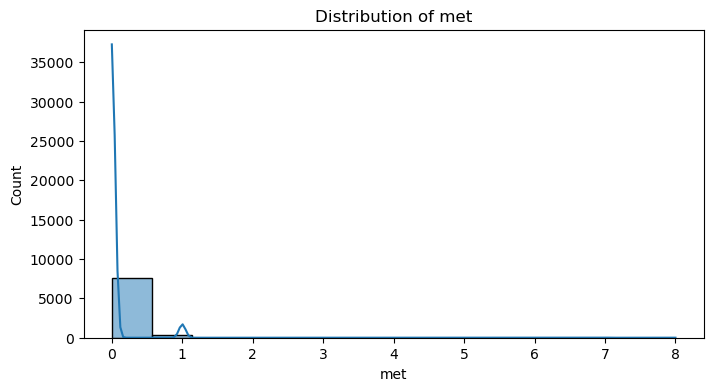

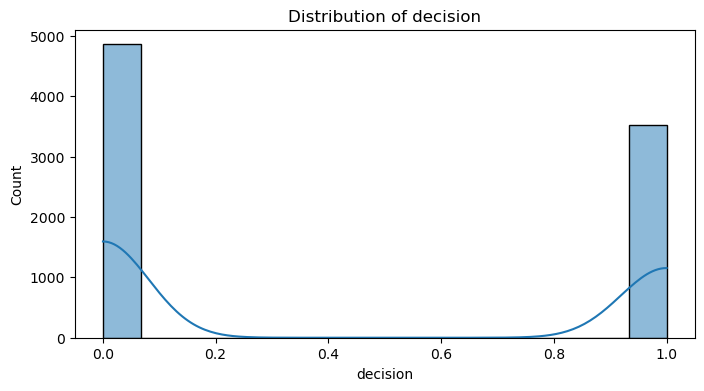

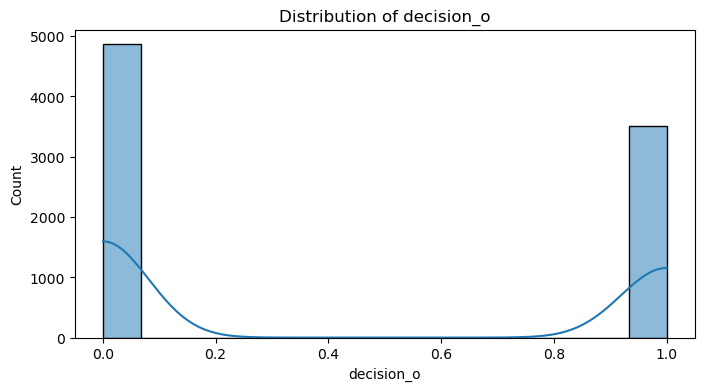

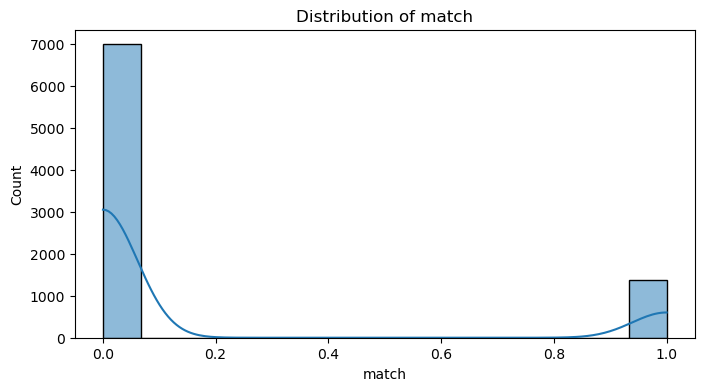

In [19]:
# Numerical Columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

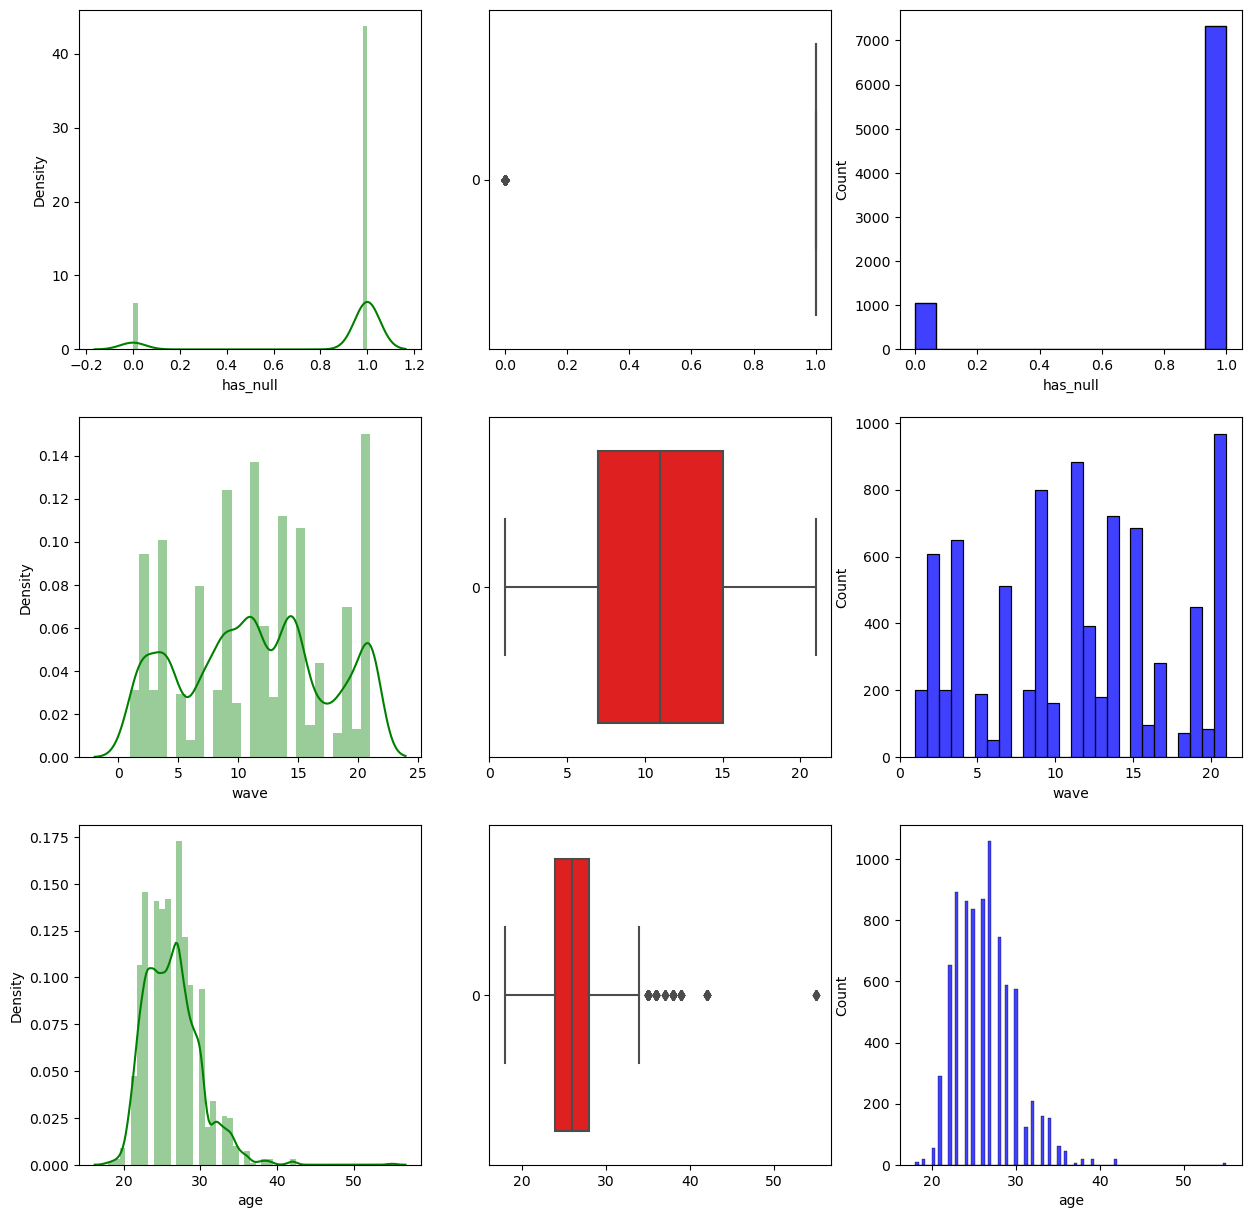

In [20]:
########## Needs fixing

#Numerical Columsn

   
figure,axes=plt.subplots(3,3,figsize=(15,15))

i=0
for col in numerical_cols:
    sns.distplot(df1[col],ax=axes[i][0],color='green')
    sns.boxplot(df1[col],orient='h',ax=axes[i][1],color='red')
    sns.histplot(df1[col],ax=axes[i][2],color='blue')
    
    i=i+1

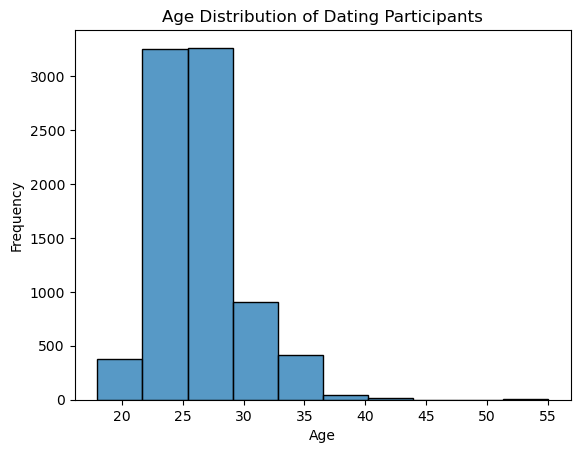

In [21]:
sns.histplot(df1['age'], kde=False, bins=10)
plt.title('Age Distribution of Dating Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


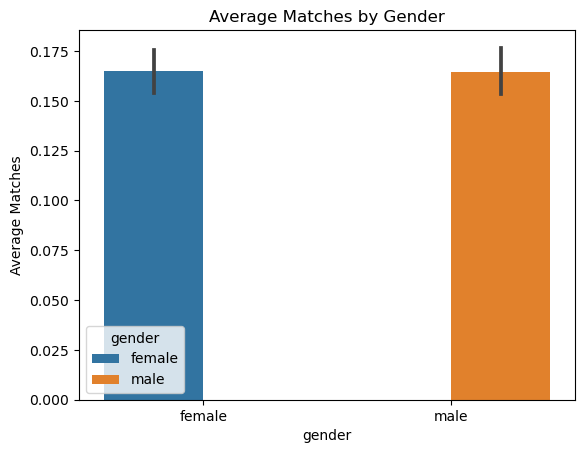

In [22]:
sns.barplot(x='gender', y='match', data=df1, hue='gender')
plt.title('Average Matches by Gender')
plt.xlabel('gender')
plt.ylabel('Average Matches')
plt.show()

In [23]:
##--variable distributioins
age_distn = df1['age'].describe()
print(age_distn) 
gender_dist = df1['gender'].value_counts()
print(gender_dist)

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64
male      4194
female    4184
Name: gender, dtype: int64


In [24]:
##--correlations
matches_by_gender = df1.groupby('gender')['match'].mean()
matches_by_vip_and_gender = df1.groupby(['gender', 'age'])['match'].mean()
print(matches_by_gender, matches_by_vip_and_gender)
age_matches_corr = dating[['age', 'match']].corr()
print(age_matches_corr)



gender
female    0.164914
male      0.164521
Name: match, dtype: float64 gender  age 
female  19.0    0.500000
        20.0    0.366667
        21.0    0.191257
        22.0    0.156593
        23.0    0.149901
        24.0    0.136564
        25.0    0.239560
        26.0    0.168699
        27.0    0.156463
        28.0    0.155063
        29.0    0.162996
        30.0    0.123223
        31.0    0.240741
        32.0    0.087719
        33.0    0.128000
        34.0    0.144578
        35.0    0.166667
        36.0    0.120000
        38.0    0.105263
        55.0    0.000000
male    18.0    0.000000
        19.0    0.000000
        20.0    0.120000
        21.0    0.277778
        22.0    0.127148
        23.0    0.175711
        24.0    0.149144
        25.0    0.227749
        26.0    0.167109
        27.0    0.160194
        28.0    0.188372
        29.0    0.154696
        30.0    0.157025
        31.0    0.070423
        32.0    0.104575
        33.0    0.111111
        34.0  

In [26]:
## Categorical Collumns
cat_col = df1.select_dtypes(include=['object', 'category']).columns.tolist()

In [28]:
#Had to be ran after treating data

## Categorical Collumns
#cat_col = df1.select_dtypes(include=['object', 'category']).columns.tolist()

##--plots e subplots
#figure,axes=plt.subplots(4,2,figsize=(8,15))

#i=0
#for col in cat_col:
#    sns.countplot(x=df1[col],ax=axes[i][0])
#    df1[col].value_counts().plot(kind='pie',ax=axes[i][1],autopct="%0.0f")
#    i=i+1

IndexError: index 8 is out of bounds for axis 0 with size 8

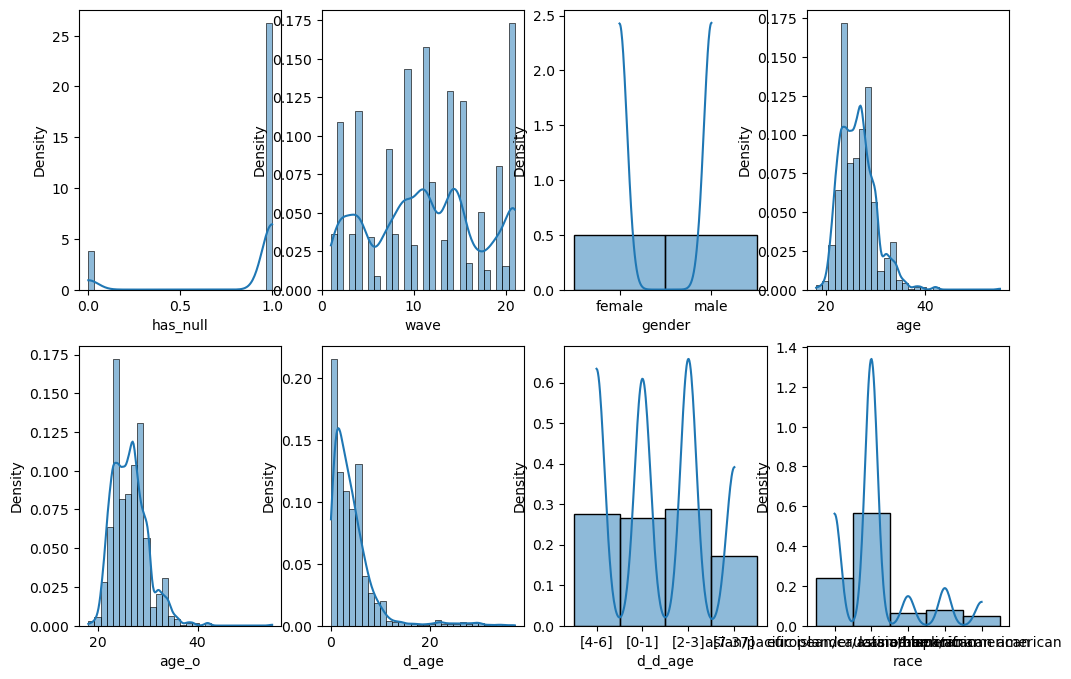

In [29]:

##-------multiple graphs
num_cols_eda = df1.columns

fig, ax = plt.subplots(2, 4, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(df1[col],kde=True,stat='density',bins=30,ax=ax[i])
    
for i in range(len(num_cols_eda),8):
    ax[i].axis('off')

plt.tight_layout()
plt.show()


IndexError: index 8 is out of bounds for axis 0 with size 8

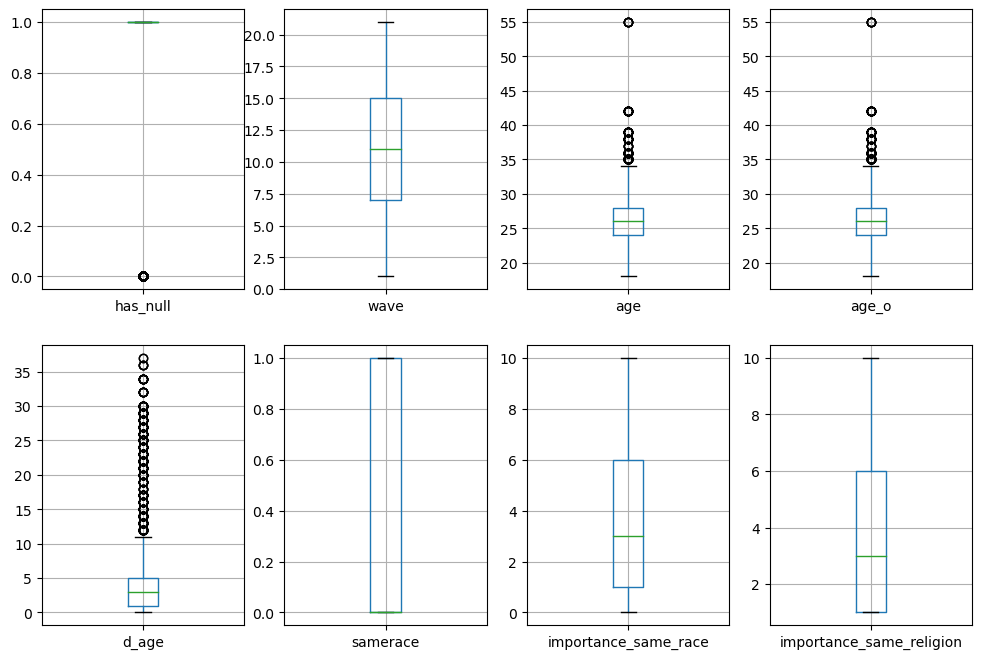

In [31]:
### Both ran the same

fig, ax = plt.subplots(2, 4, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    df1.boxplot(col, ax=ax[i])
    
for i in range(len(numerical_cols),8):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

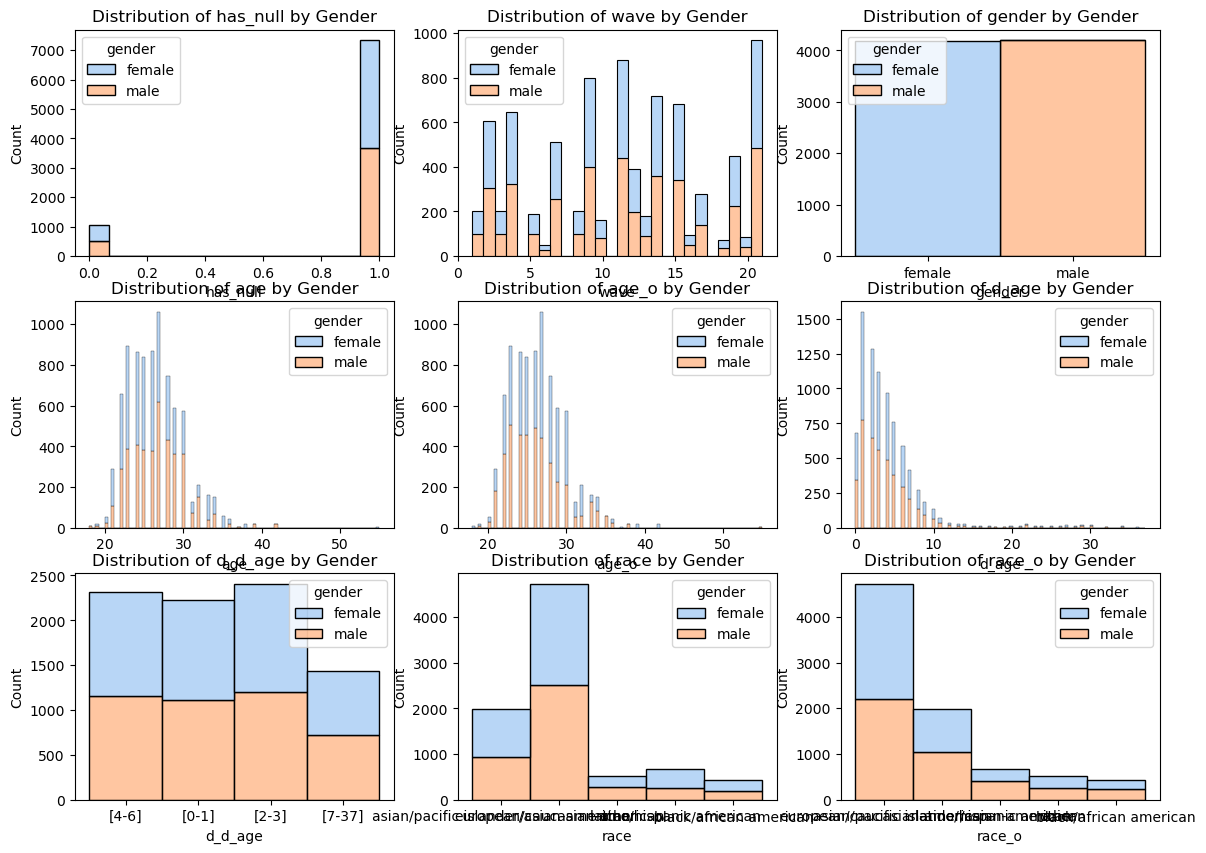

In [32]:

plt.figure(figsize=(14, 10))
for i, column in enumerate(df1.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1, x=column, hue='gender', multiple='stack', palette='pastel')
    plt.title(f'Distribution of {column} by Gender')

plt.tight_layout()
plt.show()

In [ ]:
#only after treating database


#  Bivariate Analysis
# Categorical vs Numerical
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df1, x=col, y=num_col)
        plt.title(f"{num_col} by {col}")
        plt.xticks(rotation=45)
        plt.show()

In [33]:
#You also did not run this!

#Heatmap

#corr=df1.corr()
#sns.heatmap(corr,annot=True)

In [34]:
#didn't run

# Optional Step 8: Outlier Detection using Boxplot

#for col in numerical_cols:
#    plt.figure(figsize=(8,4))
#    sns.boxplot(df1[col])
#    plt.title(f"Boxplot for {col}")
#    plt.show()

In [35]:
# Conclusion from the Analysis (To be done manually based on insights from visuals)